In [1]:
# Imporing packages

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif


In [2]:
df = pd.read_csv("D:\Guvi_Data_Science\MDT33\Capstone_Project\Final Project\loan_data.csv")

# Study on Dataset

In [3]:
df.shape

(1413701, 158)

In [4]:
df["TARGET"].value_counts()

TARGET
0    1291341
1     122360
Name: count, dtype: int64

In [5]:
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
5,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
6,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
7,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Consumer electronics,12.0,high,POS household with interest,365243.0,-281.0,49.0,365243.0,365243.0,0.0
8,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,0.0,XNA,Card X-Sell,365243.0,365243.0,365243.0,365243.0,365243.0,0.0
9,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,18.0,high,Cash X-Sell: high,NaN,NaN,NaN,NaN,NaN,NaN


In [246]:
df["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Private service staff',
       'Medicine staff', 'Security staff', 'Cooking staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB


In [7]:
data_types = df.dtypes.value_counts()

# Calculate the number of null values for each data type
null_values = df.isnull().sum().groupby(df.dtypes).sum()

# Combine the results into a DataFrame
summary = pd.DataFrame({
    'Data Type': data_types.index,
    'Total Count': data_types.values,
    'Total Null Values': null_values.values
})

# SUMMARIZE DATA TYPES

In [8]:
df.dropna(subset=["OCCUPATION_TYPE"], inplace=True)  # drop null columns

In [9]:
df.shape

(956121, 158)

# Segregating the dataset based on the datatype

In [11]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
categorical_df = df[categorical_columns]

In [12]:
categorical_df.shape

(956121, 32)

In [13]:
categorical_df.isnull().sum()

NAME_CONTRACT_TYPE_x                 0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
NAME_TYPE_SUITE_x                 2465
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
OCCUPATION_TYPE                      0
WEEKDAY_APPR_PROCESS_START_x         0
ORGANIZATION_TYPE                    0
FONDKAPREMONT_MODE              653877
HOUSETYPE_MODE                  478484
WALLSMATERIAL_MODE              484967
EMERGENCYSTATE_MODE             452545
NAME_CONTRACT_TYPE_y                 0
WEEKDAY_APPR_PROCESS_START_y         0
FLAG_LAST_APPL_PER_CONTRACT          0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE_y               472872
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY      

In [14]:
categorical_df.to_csv('categorical_data1.csv', index=False)

In [15]:
for i in categorical_df:
    categorical_df[i] = categorical_df[i].fillna(categorical_df[i].mode()[0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\848435761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df[i] = categorical_df[i].fillna(categorical_df[i].mode()[0])


In [16]:
categorical_df.isnull().sum()

NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
OCCUPATION_TYPE                 0
WEEKDAY_APPR_PROCESS_START_x    0
ORGANIZATION_TYPE               0
FONDKAPREMONT_MODE              0
HOUSETYPE_MODE                  0
WALLSMATERIAL_MODE              0
EMERGENCYSTATE_MODE             0
NAME_CONTRACT_TYPE_y            0
WEEKDAY_APPR_PROCESS_START_y    0
FLAG_LAST_APPL_PER_CONTRACT     0
NAME_CASH_LOAN_PURPOSE          0
NAME_CONTRACT_STATUS            0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON              0
NAME_TYPE_SUITE_y               0
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_TYPE               0
CHANNEL_TYPE                    0
NAME_SELLER_IN

# Encoding Ordinal and Nominal Variable Using Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder
def encoder(dataframe):
    LE = LabelEncoder()
    for column in dataframe.columns:
        dataframe[column] = LE.fit_transform(dataframe[column])
    return dataframe

In [18]:
encoder(categorical_df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2617275339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = LE.fit_transform(dataframe[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2617275339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = LE.fit_transform(dataframe[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2617275339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2617275339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = LE.fit_transform(dataframe[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2617275339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column] = LE.fit_transform(dataframe[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2617275339.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,0,1,0,1,6,5,4,3,1,8,...,7,6,0,24,3,0,7,0,3,15
1,0,0,0,0,1,3,1,1,1,3,...,7,6,2,26,2,2,5,10,3,7
2,0,0,0,0,1,3,1,1,1,3,...,7,1,1,11,3,0,7,5,4,11
3,0,0,0,0,1,3,1,1,1,3,...,7,1,1,7,3,0,4,4,4,9
4,1,1,1,1,6,5,4,3,1,8,...,7,6,0,18,3,0,6,2,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,0,0,0,0,6,0,1,1,1,8,...,7,6,2,26,2,2,5,10,4,8
1413697,0,0,0,0,6,0,1,1,1,8,...,1,6,2,26,0,1,4,2,0,0
1413698,0,0,0,0,6,0,1,1,1,8,...,1,6,2,26,2,1,5,10,3,4
1413699,0,0,0,0,6,0,1,1,1,8,...,7,6,2,26,2,2,0,10,3,7


In [19]:
TARGET = df["TARGET"]

In [20]:
categorical_df = pd.concat([TARGET, categorical_df], axis =1)

In [21]:
# Get unique values for each column in the DataFrame
unique_values = {column: categorical_df[column].unique() for column in categorical_df.columns}

# Display the unique values
for column, values in unique_values.items():
    print(f"Unique values in column '{column}': {values}\n")

Unique values in column 'TARGET': [1 0]

Unique values in column 'NAME_CONTRACT_TYPE_x': [0 1]

Unique values in column 'CODE_GENDER': [1 0 2]

Unique values in column 'FLAG_OWN_CAR': [0 1]

Unique values in column 'FLAG_OWN_REALTY': [1 0]

Unique values in column 'NAME_TYPE_SUITE_x': [6 1 5 3 0 2 4]

Unique values in column 'NAME_INCOME_TYPE': [5 3 0 4 2 1]

Unique values in column 'NAME_EDUCATION_TYPE': [4 1 2 3 0]

Unique values in column 'NAME_FAMILY_STATUS': [3 1 0 4 2]

Unique values in column 'NAME_HOUSING_TYPE': [1 4 5 2 3 0]

Unique values in column 'OCCUPATION_TYPE': [ 8  3  0 10  4 14  1 12 11 16  2  6 17  9 13 15  7  5]

Unique values in column 'WEEKDAY_APPR_PROCESS_START_x': [6 1 4 3 2 0 5]

Unique values in column 'ORGANIZATION_TYPE': [ 5 39 11 37 33  9 30  4 42 53  7 13 28 51 16 43 41 55 14 40 46 34  3 35
 54  1 38  8 20 12 31 47 26  2 50 19 56 52 17 21 27 24 10 32 45 22 15 29
  0 49  6 18 48 44 25 36 23 57]

Unique values in column 'FONDKAPREMONT_MODE': [2 1 3 0]

Uniqu

In [22]:
categorical_df.isnull().sum()

TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
OCCUPATION_TYPE                 0
WEEKDAY_APPR_PROCESS_START_x    0
ORGANIZATION_TYPE               0
FONDKAPREMONT_MODE              0
HOUSETYPE_MODE                  0
WALLSMATERIAL_MODE              0
EMERGENCYSTATE_MODE             0
NAME_CONTRACT_TYPE_y            0
WEEKDAY_APPR_PROCESS_START_y    0
FLAG_LAST_APPL_PER_CONTRACT     0
NAME_CASH_LOAN_PURPOSE          0
NAME_CONTRACT_STATUS            0
NAME_PAYMENT_TYPE               0
CODE_REJECT_REASON              0
NAME_TYPE_SUITE_y               0
NAME_CLIENT_TYPE                0
NAME_GOODS_CATEGORY             0
NAME_PORTFOLIO                  0
NAME_PRODUCT_TYPE               0
CHANNEL_TYPE  

In [24]:
categorical_df

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,0,1,0,1,6,5,4,3,1,...,7,6,0,24,3,0,7,0,3,15
1,0,0,0,0,0,1,3,1,1,1,...,7,6,2,26,2,2,5,10,3,7
2,0,0,0,0,0,1,3,1,1,1,...,7,1,1,11,3,0,7,5,4,11
3,0,0,0,0,0,1,3,1,1,1,...,7,1,1,7,3,0,4,4,4,9
4,0,1,1,1,1,6,5,4,3,1,...,7,6,0,18,3,0,6,2,4,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,0,0,0,0,0,6,0,1,1,1,...,7,6,2,26,2,2,5,10,4,8
1413697,0,0,0,0,0,6,0,1,1,1,...,1,6,2,26,0,1,4,2,0,0
1413698,0,0,0,0,0,6,0,1,1,1,...,1,6,2,26,2,1,5,10,3,4
1413699,0,0,0,0,0,6,0,1,1,1,...,7,6,2,26,2,2,0,10,3,7


In [25]:
unique_counts_df = pd.DataFrame({
    'Column': categorical_df.columns,
    'Number of Unique Values': categorical_df.nunique()}).sort_values(by='Number of Unique Values', ascending=False)
unique_counts_df

,Column,Number of Unique Values
ORGANIZATION_TYPE,ORGANIZATION_TYPE,58
NAME_GOODS_CATEGORY,NAME_GOODS_CATEGORY,27
NAME_CASH_LOAN_PURPOSE,NAME_CASH_LOAN_PURPOSE,25
OCCUPATION_TYPE,OCCUPATION_TYPE,18
PRODUCT_COMBINATION,PRODUCT_COMBINATION,17
NAME_SELLER_INDUSTRY,NAME_SELLER_INDUSTRY,11
CODE_REJECT_REASON,CODE_REJECT_REASON,9
CHANNEL_TYPE,CHANNEL_TYPE,8
WALLSMATERIAL_MODE,WALLSMATERIAL_MODE,7
NAME_TYPE_SUITE_y,NAME_TYPE_SUITE_y,7


In [26]:
categorical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,956121.0,0.094639,0.292715,0.0,0.0,0.0,0.0,1.0
NAME_CONTRACT_TYPE_x,956121.0,0.079942,0.271203,0.0,0.0,0.0,0.0,1.0
CODE_GENDER,956121.0,0.376686,0.484618,0.0,0.0,0.0,1.0,2.0
FLAG_OWN_CAR,956121.0,0.382428,0.485980,0.0,0.0,0.0,1.0,1.0
FLAG_OWN_REALTY,956121.0,0.710028,0.453749,0.0,0.0,1.0,1.0,1.0
NAME_TYPE_SUITE_x,956121.0,5.259542,1.737515,0.0,6.0,6.0,6.0,6.0
NAME_INCOME_TYPE,956121.0,3.441786,2.207390,0.0,0.0,5.0,5.0,5.0
NAME_EDUCATION_TYPE,956121.0,3.213458,1.285423,0.0,2.0,4.0,4.0,4.0
NAME_FAMILY_STATUS,956121.0,1.313437,0.937456,0.0,1.0,1.0,1.0,4.0
NAME_HOUSING_TYPE,956121.0,1.312586,0.988122,0.0,1.0,1.0,1.0,5.0


In [23]:
categorical_df['TARGET'].unique()

array([1, 0], dtype=int64)

# Feature Selection from Categorical column using correlation and Other methods

In [24]:
# Assuming df is your DataFrame and 'target' is your target column
X = categorical_df.drop(columns=['TARGET'])
y = categorical_df['TARGET']

In [25]:
X.shape

(956121, 32)

In [26]:
y.shape

(956121,)

# Chi Square TEST for Feature Selection

In [27]:
from sklearn.feature_selection import chi2

# Perform Chi-Square test
chi_scores = chi2(X, y)

# Convert to a DataFrame for better readability
chi_df = pd.DataFrame({'feature': X.columns, 'Chi-Square Score': chi_scores[0]}).sort_values(by='Chi-Square Score', ascending=False)

# Filter the DataFrame where MI score > 0.1 and Chi-Square score > 500
filtered_df = chi_df[(chi_df['Chi-Square Score'] > 500)].reset_index(drop=True)
filtered_df

,feature,Chi-Square Score
0,NAME_GOODS_CATEGORY,5124.450415
1,PRODUCT_COMBINATION,4610.904348
2,NAME_CONTRACT_STATUS,3520.641531
3,CODE_REJECT_REASON,1779.828802
4,NAME_EDUCATION_TYPE,1721.610361
5,NAME_YIELD_GROUP,1704.441827
6,NAME_PAYMENT_TYPE,1659.178648
7,NAME_INCOME_TYPE,1520.791904
8,NAME_SELLER_INDUSTRY,1479.064734
9,NAME_CONTRACT_TYPE_x,1274.092341


In [28]:
selected_chi2_features = filtered_df['feature']
selected_chi2_features

0      NAME_GOODS_CATEGORY
1      PRODUCT_COMBINATION
2     NAME_CONTRACT_STATUS
3       CODE_REJECT_REASON
4      NAME_EDUCATION_TYPE
5         NAME_YIELD_GROUP
6        NAME_PAYMENT_TYPE
7         NAME_INCOME_TYPE
8     NAME_SELLER_INDUSTRY
9     NAME_CONTRACT_TYPE_x
10             CODE_GENDER
11         OCCUPATION_TYPE
12       NAME_HOUSING_TYPE
13            FLAG_OWN_CAR
Name: feature, dtype: object

In [29]:
filtered_df.shape

(14, 2)

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

#X_encoded = pd.DataFrame(X_encoded)

# Select top 10 features
kbest = SelectKBest(score_func=f_classif, k=10)
X_selected = kbest.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[kbest.get_support()]

In [31]:
selected_features

Index(['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [32]:
# Compute the correlation matrix
corr = categorical_df.corr()

# Get correlations with the target variable
target_corr = corr['TARGET'].abs().sort_values(ascending=False)

# Select top 10 features (excluding the target variable itself)
top_features = target_corr.index[1:11]

In [33]:
top_features

Index(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'PRODUCT_COMBINATION', 'NAME_CONTRACT_TYPE_x',
       'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP', 'NAME_INCOME_TYPE',
       'NAME_HOUSING_TYPE'],
      dtype='object')

# Selection Top 10 Categorical Features 

In [34]:
common_features = set(top_features) & set(selected_features) & set(selected_chi2_features)

# Convert to a list to handle them
common_features = list(common_features)

# Get the correlations of the common features with the target variable
common_features_corr = target_corr[common_features].sort_values(ascending=False)

# Select the top 10 common features
top_10_common_features = common_features_corr.index[:10]

# Display the top 10 common features
print("Top 10 common features selected by all three methods:", list(top_10_common_features))

Top 10 common features selected by all three methods: ['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'CODE_GENDER', 'PRODUCT_COMBINATION', 'NAME_CONTRACT_TYPE_x', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP', 'NAME_INCOME_TYPE']


In [35]:
Selected_cat_df = categorical_df[['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'CODE_GENDER', 
                                 'PRODUCT_COMBINATION', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP', 
                                 'NAME_INCOME_TYPE','OCCUPATION_TYPE']]


In [36]:
Selected_cat_df .shape

(956121, 9)

In [37]:
Selected_cat_df

,NAME_EDUCATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CODE_GENDER,PRODUCT_COMBINATION,NAME_GOODS_CATEGORY,NAME_YIELD_GROUP,NAME_INCOME_TYPE,OCCUPATION_TYPE
0,4,0,7,1,15,24,3,5,8
1,1,0,7,0,7,26,3,3,3
2,1,0,7,0,11,11,4,3,3
3,1,0,7,0,9,7,4,3,3
4,4,0,7,1,14,18,4,5,8
...,...,...,...,...,...,...,...,...,...
1413696,1,0,7,0,8,26,4,0,8
1413697,1,2,1,0,0,26,0,0,8
1413698,1,2,1,0,4,26,3,0,8
1413699,1,0,7,0,7,26,3,0,8


<Axes: title={'center': 'Correlation Heatmap'}>

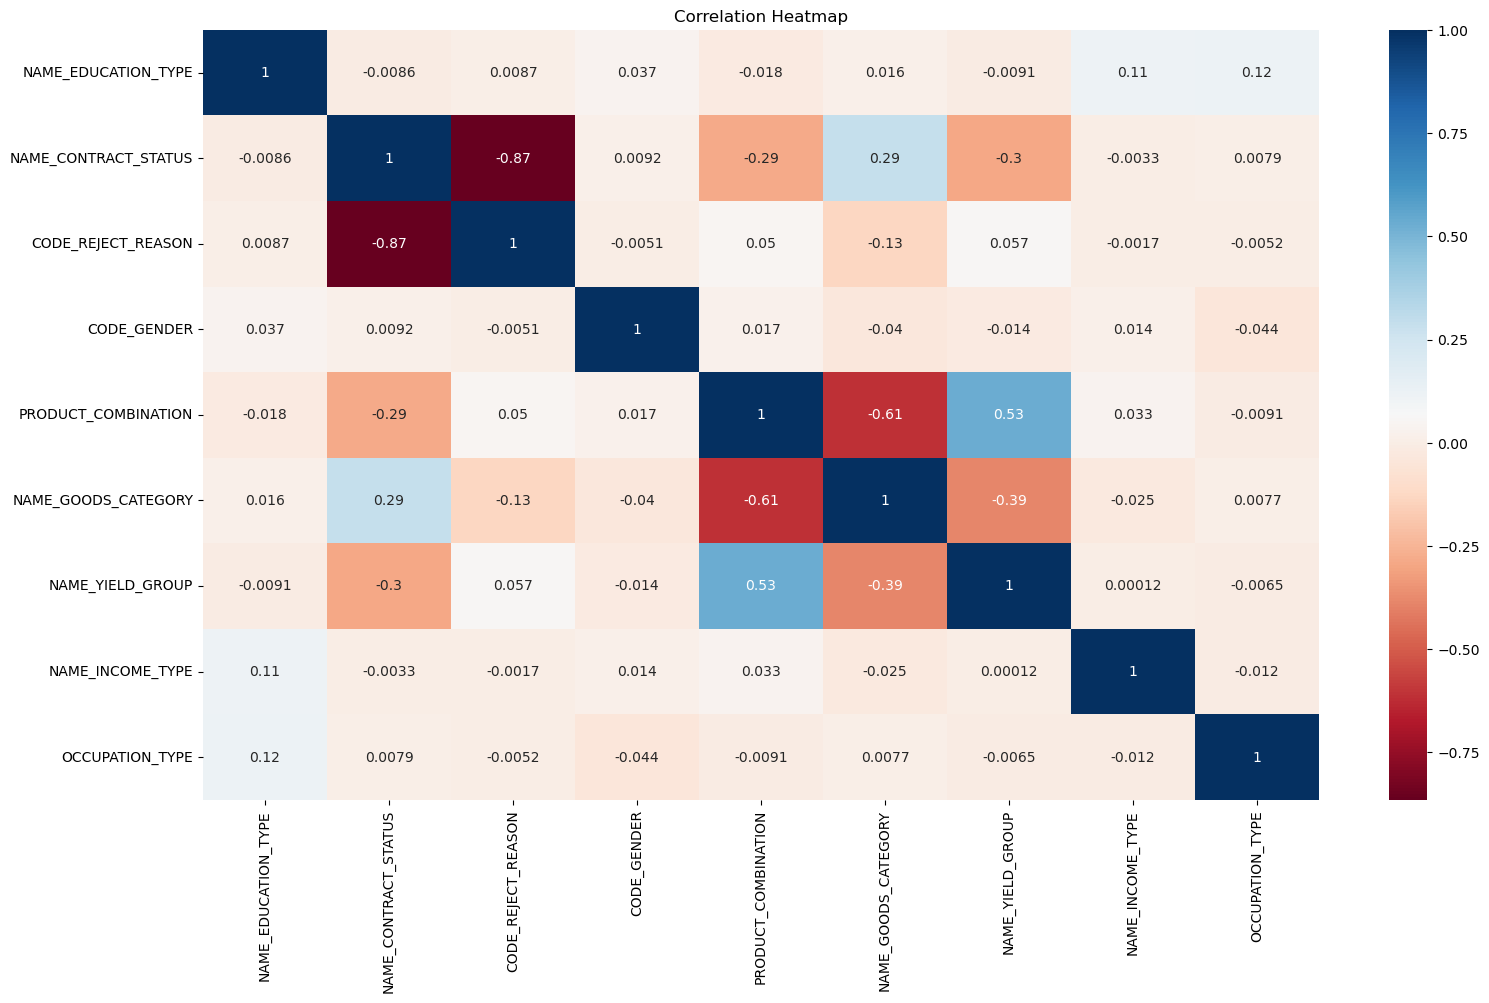

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = Selected_cat_df.corr()
plt.figure(figsize=(18, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)

In [43]:
Selected_cat_df.columns

Index(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'PRODUCT_COMBINATION', 'NAME_GOODS_CATEGORY',
       'NAME_YIELD_GROUP', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')

In [44]:
Selected_cat_df.dtypes

NAME_EDUCATION_TYPE     int32
NAME_CONTRACT_STATUS    int32
CODE_REJECT_REASON      int32
CODE_GENDER             int32
PRODUCT_COMBINATION     int32
NAME_GOODS_CATEGORY     int32
NAME_YIELD_GROUP        int32
NAME_INCOME_TYPE        int32
OCCUPATION_TYPE         int32
dtype: object

In [45]:
Selected_cat_df.isnull().sum()

NAME_EDUCATION_TYPE     0
NAME_CONTRACT_STATUS    0
CODE_REJECT_REASON      0
CODE_GENDER             0
PRODUCT_COMBINATION     0
NAME_GOODS_CATEGORY     0
NAME_YIELD_GROUP        0
NAME_INCOME_TYPE        0
OCCUPATION_TYPE         0
dtype: int64

In [46]:
Selected_cat_df.shape

(956121, 9)

# Numerical Columns Preprocess and Feature Selection

In [47]:
# Separate numerical columns
num_columns = df.select_dtypes(include=['int64']).columns
num_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'SK_ID_PREV', 'HOUR_APPR_PROCESS_START_y',
       'NFLAG_LAST_APPL_

In [48]:
num_df = df[num_columns]
num_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SK_ID_PREV,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,1038818,9,1,-606,500
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,1810518,12,1,-746,-1
2,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,2636178,17,1,-828,1400
3,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,2396755,15,1,-2341,200
4,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,1564014,5,1,-815,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,0,-16856,-1262,-410,1,1,1,1,...,0,0,0,0,0,2073384,12,1,-648,-1
1413697,456255,0,0,-16856,-1262,-410,1,1,1,1,...,0,0,0,0,0,1708056,14,1,-456,20
1413698,456255,0,0,-16856,-1262,-410,1,1,1,1,...,0,0,0,0,0,1296007,14,1,-171,-1
1413699,456255,0,0,-16856,-1262,-410,1,1,1,1,...,0,0,0,0,0,2631384,14,1,-787,6


In [49]:
num_df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
CNT_CHILDREN                   0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START_x      0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUM

In [50]:
num_df['REGION_RATING_CLIENT_W_CITY'].unique()

array([2, 1, 3], dtype=int64)

In [51]:
#num_df.to_csv('num_data.csv', index=False)

In [52]:
num_df.dtypes

SK_ID_CURR                     int64
TARGET                         int64
CNT_CHILDREN                   int64
DAYS_BIRTH                     int64
DAYS_EMPLOYED                  int64
DAYS_ID_PUBLISH                int64
FLAG_MOBIL                     int64
FLAG_EMP_PHONE                 int64
FLAG_WORK_PHONE                int64
FLAG_CONT_MOBILE               int64
FLAG_PHONE                     int64
FLAG_EMAIL                     int64
REGION_RATING_CLIENT           int64
REGION_RATING_CLIENT_W_CITY    int64
HOUR_APPR_PROCESS_START_x      int64
REG_REGION_NOT_LIVE_REGION     int64
REG_REGION_NOT_WORK_REGION     int64
LIVE_REGION_NOT_WORK_REGION    int64
REG_CITY_NOT_LIVE_CITY         int64
REG_CITY_NOT_WORK_CITY         int64
LIVE_CITY_NOT_WORK_CITY        int64
FLAG_DOCUMENT_2                int64
FLAG_DOCUMENT_3                int64
FLAG_DOCUMENT_4                int64
FLAG_DOCUMENT_5                int64
FLAG_DOCUMENT_6                int64
FLAG_DOCUMENT_7                int64
F

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = num_df.corr()

# Get correlations with the target variable
target_corr = corr['TARGET'].abs().sort_values(ascending=False)

# Select top 10 features
top_features_num = target_corr.index[1:11]

In [54]:
top_features_num

Index(['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_DECISION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'DAYS_ID_PUBLISH',
       'HOUR_APPR_PROCESS_START_y'],
      dtype='object')

In [55]:
X1 = num_df.drop(columns = ["TARGET"])
Y1=num_df["TARGET"]

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features
kbest = SelectKBest(score_func=f_classif, k=10)
X_selected = kbest.fit_transform(X1, Y1)

# Get selected feature names
selected_features_num = X1.columns[kbest.get_support()]

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [57]:
selected_features_num

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3',
       'HOUR_APPR_PROCESS_START_y', 'DAYS_DECISION'],
      dtype='object')

In [58]:
common_features_num = set(top_features_num) & set(selected_features_num)

# Convert to a list to handle them
common_features_num = list(common_features_num)

# Get the correlations of the common features with the target variable
common_features_corr_num = target_corr[common_features_num].sort_values(ascending=False)

# Select the top 10 common features
top_10_common_features_num = common_features_corr_num.index[:10]

# Display the top 10 common features
print("Top 10 common features selected by all three methods:", list(top_10_common_features_num))

Top 10 common features selected by all three methods: ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_DECISION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_3', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START_y']


In [59]:
Selected_num_df = num_df[['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_DECISION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY','DAYS_ID_PUBLISH']]

In [60]:
Selected_num_df.shape

(956121, 8)

In [61]:
Selected_num_df.isnull().sum()

REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_DECISION                  0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
DAYS_ID_PUBLISH                0
dtype: int64

In [63]:
Selected_num_df.dtypes

REGION_RATING_CLIENT_W_CITY    int64
REGION_RATING_CLIENT           int64
DAYS_BIRTH                     int64
DAYS_EMPLOYED                  int64
DAYS_DECISION                  int64
REG_CITY_NOT_LIVE_CITY         int64
REG_CITY_NOT_WORK_CITY         int64
DAYS_ID_PUBLISH                int64
dtype: object

In [62]:
Selected_num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988,0.489597,1.0,2.0,2.0,2.0,3.0
REGION_RATING_CLIENT,956121.0,2.057545,0.496085,1.0,2.0,2.0,2.0,3.0
DAYS_BIRTH,956121.0,-14961.033096,3612.126372,-25200.0,-17667.0,-14785.0,-12011.0,-7489.0
DAYS_EMPLOYED,956121.0,-2437.763144,2831.328460,-17912.0,-3240.0,-1747.0,-842.0,365243.0
DAYS_DECISION,956121.0,-886.327111,783.622519,-2922.0,-1323.0,-591.0,-276.0,-1.0
REG_CITY_NOT_LIVE_CITY,956121.0,0.085906,0.280226,0.0,0.0,0.0,0.0,1.0
REG_CITY_NOT_WORK_CITY,956121.0,0.274845,0.446436,0.0,0.0,0.0,1.0,1.0
DAYS_ID_PUBLISH,956121.0,-2830.640985,1517.369034,-7197.0,-4196.0,-2945.0,-1530.0,0.0


In [64]:
float_columns = df.select_dtypes(include=['float64']).columns
float_columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS

In [65]:
float_df = df[float_columns]
float_df

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,NaN,1.0,0.083037,0.262949,...,0.000000,NaN,NaN,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,NaN,NaN,NaN,12.0,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.000000,NaN,NaN,6.0,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,NaN,2.0,0.311267,0.622246,...,0.100061,NaN,NaN,12.0,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,26.0,1.0,NaN,0.555912,...,0.212008,NaN,NaN,4.0,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,157500.0,675000.0,49117.5,675000.0,0.046220,-5128.0,NaN,2.0,0.734460,0.708569,...,NaN,NaN,NaN,24.0,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,157500.0,675000.0,49117.5,675000.0,0.046220,-5128.0,NaN,2.0,0.734460,0.708569,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1413698,157500.0,675000.0,49117.5,675000.0,0.046220,-5128.0,NaN,2.0,0.734460,0.708569,...,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN
1413699,157500.0,675000.0,49117.5,675000.0,0.046220,-5128.0,NaN,2.0,0.734460,0.708569,...,NaN,NaN,NaN,36.0,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [67]:
float_df.isnull().sum()

AMT_INCOME_TOTAL                   0
AMT_CREDIT_x                       0
AMT_ANNUITY_x                     93
AMT_GOODS_PRICE_x                937
REGION_POPULATION_RELATIVE         0
                               ...  
DAYS_FIRST_DUE                378384
DAYS_LAST_DUE_1ST_VERSION     378384
DAYS_LAST_DUE                 378384
DAYS_TERMINATION              378384
NFLAG_INSURED_ON_APPROVAL     378384
Length: 80, dtype: int64

In [68]:
for i in float_df:
    float_df[i] = float_df[i].fillna(float_df[i].mean())

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\215099668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  float_df[i] = float_df[i].fillna(float_df[i].mean())


In [69]:
float_df.isnull().sum()

AMT_INCOME_TOTAL              0
AMT_CREDIT_x                  0
AMT_ANNUITY_x                 0
AMT_GOODS_PRICE_x             0
REGION_POPULATION_RELATIVE    0
                             ..
DAYS_FIRST_DUE                0
DAYS_LAST_DUE_1ST_VERSION     0
DAYS_LAST_DUE                 0
DAYS_TERMINATION              0
NFLAG_INSURED_ON_APPROVAL     0
Length: 80, dtype: int64

In [69]:
    #float_df.to_csv('float_df.csv', index=False)

In [70]:
Float_target = pd.concat([float_df, TARGET], axis=1)

In [71]:
Float_target.dtypes

AMT_INCOME_TOTAL              float64
AMT_CREDIT_x                  float64
AMT_ANNUITY_x                 float64
AMT_GOODS_PRICE_x             float64
REGION_POPULATION_RELATIVE    float64
                               ...   
DAYS_LAST_DUE_1ST_VERSION     float64
DAYS_LAST_DUE                 float64
DAYS_TERMINATION              float64
NFLAG_INSURED_ON_APPROVAL     float64
TARGET                          int64
Length: 81, dtype: object

In [72]:
# Compute the correlation matrix
corr = Float_target.corr()

# Get correlations with the target variable
target_corr = corr['TARGET'].abs().sort_values(ascending=False)

# Select top 10 features (excluding the target variable itself)
top_features_float = target_corr.index[1:11]

In [73]:
top_features_float

Index(['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'AMT_CREDIT_x',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_AVG'],
      dtype='object')

In [74]:
X2=Float_target.drop(columns=["TARGET"])
Y2=Float_target["TARGET"]

In [75]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 10 features
kbest = SelectKBest(score_func=f_classif, k=10)
X_selected = kbest.fit_transform(X2, Y2)

# Get selected feature names
selected_features_float = X2.columns[kbest.get_support()]

In [76]:
selected_features_float

Index(['AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE',
       'DAYS_REGISTRATION', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'FLOORSMAX_AVG', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [77]:
common_features_flt = set(top_features_float) & set(selected_features_float)

# Convert to a list to handle them
common_features_flt = list(common_features_flt)

# Get the correlations of the common features with the target variable
common_features_corr_flt = target_corr[common_features_flt].sort_values(ascending=False)

# Select the top 10 common features
top_10_common_features_flt = common_features_corr_flt.index[:10]

# Display the top 10 common features
print("Top 10 common features selected by all three methods:", list(top_10_common_features_flt))

Top 10 common features selected by all three methods: ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_LAST_PHONE_CHANGE', 'AMT_GOODS_PRICE_x', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'AMT_CREDIT_x', 'DEF_30_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_AVG']


In [78]:
Selected_flt_df = Float_target[['DAYS_LAST_PHONE_CHANGE', 
                                'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL']]

In [79]:
Selected_flt_df.columns

Index(['DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL'], dtype='object')

In [80]:
Final_df = pd.concat([Selected_cat_df, Selected_num_df, Selected_flt_df,TARGET], axis=1)
Final_df

,NAME_EDUCATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CODE_GENDER,PRODUCT_COMBINATION,NAME_GOODS_CATEGORY,NAME_YIELD_GROUP,NAME_INCOME_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_DECISION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,AMT_INCOME_TOTAL,TARGET
0,4,0,7,1,15,24,3,5,8,2,...,-9461,-637,-606,0,0,-2120,-1134.0,-3648.0,202500.0,1
1,1,0,7,0,7,26,3,3,3,1,...,-16765,-1188,-746,0,0,-291,-828.0,-1186.0,270000.0,0
2,1,0,7,0,11,11,4,3,3,1,...,-16765,-1188,-828,0,0,-291,-828.0,-1186.0,270000.0,0
3,1,0,7,0,9,7,4,3,3,1,...,-16765,-1188,-2341,0,0,-291,-828.0,-1186.0,270000.0,0
4,4,0,7,1,14,18,4,5,8,2,...,-19046,-225,-815,0,0,-2531,-815.0,-4260.0,67500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1,0,7,0,8,26,4,0,8,1,...,-16856,-1262,-648,0,1,-410,-787.0,-5128.0,157500.0,0
1413697,1,2,1,0,0,26,0,0,8,1,...,-16856,-1262,-456,0,1,-410,-787.0,-5128.0,157500.0,0
1413698,1,2,1,0,4,26,3,0,8,1,...,-16856,-1262,-171,0,1,-410,-787.0,-5128.0,157500.0,0
1413699,1,0,7,0,7,26,3,0,8,1,...,-16856,-1262,-787,0,1,-410,-787.0,-5128.0,157500.0,0


In [81]:
Final_df.columns

Index(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'PRODUCT_COMBINATION', 'NAME_GOODS_CATEGORY',
       'NAME_YIELD_GROUP', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_DECISION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'TARGET'],
      dtype='object')

In [82]:
Final_df.dtypes

NAME_EDUCATION_TYPE              int32
NAME_CONTRACT_STATUS             int32
CODE_REJECT_REASON               int32
CODE_GENDER                      int32
PRODUCT_COMBINATION              int32
NAME_GOODS_CATEGORY              int32
NAME_YIELD_GROUP                 int32
NAME_INCOME_TYPE                 int32
OCCUPATION_TYPE                  int32
REGION_RATING_CLIENT_W_CITY      int64
REGION_RATING_CLIENT             int64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_DECISION                    int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
DAYS_ID_PUBLISH                  int64
DAYS_LAST_PHONE_CHANGE         float64
DAYS_REGISTRATION              float64
AMT_INCOME_TOTAL               float64
TARGET                           int64
dtype: object

In [83]:
Final_df.head(5)

,NAME_EDUCATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CODE_GENDER,PRODUCT_COMBINATION,NAME_GOODS_CATEGORY,NAME_YIELD_GROUP,NAME_INCOME_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_DECISION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,AMT_INCOME_TOTAL,TARGET
0,4,0,7,1,15,24,3,5,8,2,...,-9461,-637,-606,0,0,-2120,-1134.0,-3648.0,202500.0,1
1,1,0,7,0,7,26,3,3,3,1,...,-16765,-1188,-746,0,0,-291,-828.0,-1186.0,270000.0,0
2,1,0,7,0,11,11,4,3,3,1,...,-16765,-1188,-828,0,0,-291,-828.0,-1186.0,270000.0,0
3,1,0,7,0,9,7,4,3,3,1,...,-16765,-1188,-2341,0,0,-291,-828.0,-1186.0,270000.0,0
4,4,0,7,1,14,18,4,5,8,2,...,-19046,-225,-815,0,0,-2531,-815.0,-4260.0,67500.0,0


In [84]:
Final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,956121.0,3.213458,1.285423,0.0,2.0,4.0,4.0,4.0
NAME_CONTRACT_STATUS,956121.0,0.585239,0.840389,0.0,0.0,0.0,1.0,3.0
CODE_REJECT_REASON,956121.0,5.963233,2.193976,0.0,7.0,7.0,7.0,8.0
CODE_GENDER,956121.0,0.376686,0.484618,0.0,0.0,0.0,1.0,2.0
PRODUCT_COMBINATION,956121.0,7.079764,4.439733,0.0,2.0,8.0,10.0,16.0
NAME_GOODS_CATEGORY,956121.0,19.019708,8.850809,0.0,11.0,26.0,26.0,26.0
NAME_YIELD_GROUP,956121.0,1.793946,1.579239,0.0,0.0,1.0,3.0,4.0
NAME_INCOME_TYPE,956121.0,3.441786,2.207390,0.0,0.0,5.0,5.0,5.0
OCCUPATION_TYPE,956121.0,7.928290,4.424132,0.0,4.0,8.0,11.0,17.0
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988,0.489597,1.0,2.0,2.0,2.0,3.0


In [85]:
        Final_df['DAYS_BIRTH'] = Final_df['DAYS_BIRTH'].abs()  
        Final_df["DAYS_LAST_PHONE_CHANGE"]=Final_df["DAYS_LAST_PHONE_CHANGE"].abs()
        Final_df['DAYS_ID_PUBLISH'] = Final_df['DAYS_ID_PUBLISH'].abs() 
        Final_df["DAYS_REGISTRATION"]=Final_df["DAYS_REGISTRATION"].abs()
        Final_df["DAYS_EMPLOYED"]=Final_df["DAYS_EMPLOYED"].abs()
        Final_df["DAYS_DECISION"]=Final_df["DAYS_DECISION"].abs()

In [86]:
Final_df["DAYS_REGISTRATION"].unique()

array([ 3648.,  1186.,  4260., ..., 12316., 14083., 12372.])

In [87]:
Final_df

,NAME_EDUCATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CODE_GENDER,PRODUCT_COMBINATION,NAME_GOODS_CATEGORY,NAME_YIELD_GROUP,NAME_INCOME_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,...,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_DECISION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,AMT_INCOME_TOTAL,TARGET
0,4,0,7,1,15,24,3,5,8,2,...,9461,637,606,0,0,2120,1134.0,3648.0,202500.0,1
1,1,0,7,0,7,26,3,3,3,1,...,16765,1188,746,0,0,291,828.0,1186.0,270000.0,0
2,1,0,7,0,11,11,4,3,3,1,...,16765,1188,828,0,0,291,828.0,1186.0,270000.0,0
3,1,0,7,0,9,7,4,3,3,1,...,16765,1188,2341,0,0,291,828.0,1186.0,270000.0,0
4,4,0,7,1,14,18,4,5,8,2,...,19046,225,815,0,0,2531,815.0,4260.0,67500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1,0,7,0,8,26,4,0,8,1,...,16856,1262,648,0,1,410,787.0,5128.0,157500.0,0
1413697,1,2,1,0,0,26,0,0,8,1,...,16856,1262,456,0,1,410,787.0,5128.0,157500.0,0
1413698,1,2,1,0,4,26,3,0,8,1,...,16856,1262,171,0,1,410,787.0,5128.0,157500.0,0
1413699,1,0,7,0,7,26,3,0,8,1,...,16856,1262,787,0,1,410,787.0,5128.0,157500.0,0


In [88]:
Final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,956121.0,3.213458,1.285423,0.0,2.0,4.0,4.0,4.0
NAME_CONTRACT_STATUS,956121.0,0.585239,0.840389,0.0,0.0,0.0,1.0,3.0
CODE_REJECT_REASON,956121.0,5.963233,2.193976,0.0,7.0,7.0,7.0,8.0
CODE_GENDER,956121.0,0.376686,0.484618,0.0,0.0,0.0,1.0,2.0
PRODUCT_COMBINATION,956121.0,7.079764,4.439733,0.0,2.0,8.0,10.0,16.0
NAME_GOODS_CATEGORY,956121.0,19.019708,8.850809,0.0,11.0,26.0,26.0,26.0
NAME_YIELD_GROUP,956121.0,1.793946,1.579239,0.0,0.0,1.0,3.0,4.0
NAME_INCOME_TYPE,956121.0,3.441786,2.207390,0.0,0.0,5.0,5.0,5.0
OCCUPATION_TYPE,956121.0,7.928290,4.424132,0.0,4.0,8.0,11.0,17.0
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988,0.489597,1.0,2.0,2.0,2.0,3.0


<Axes: title={'center': 'Correlation Heatmap'}>

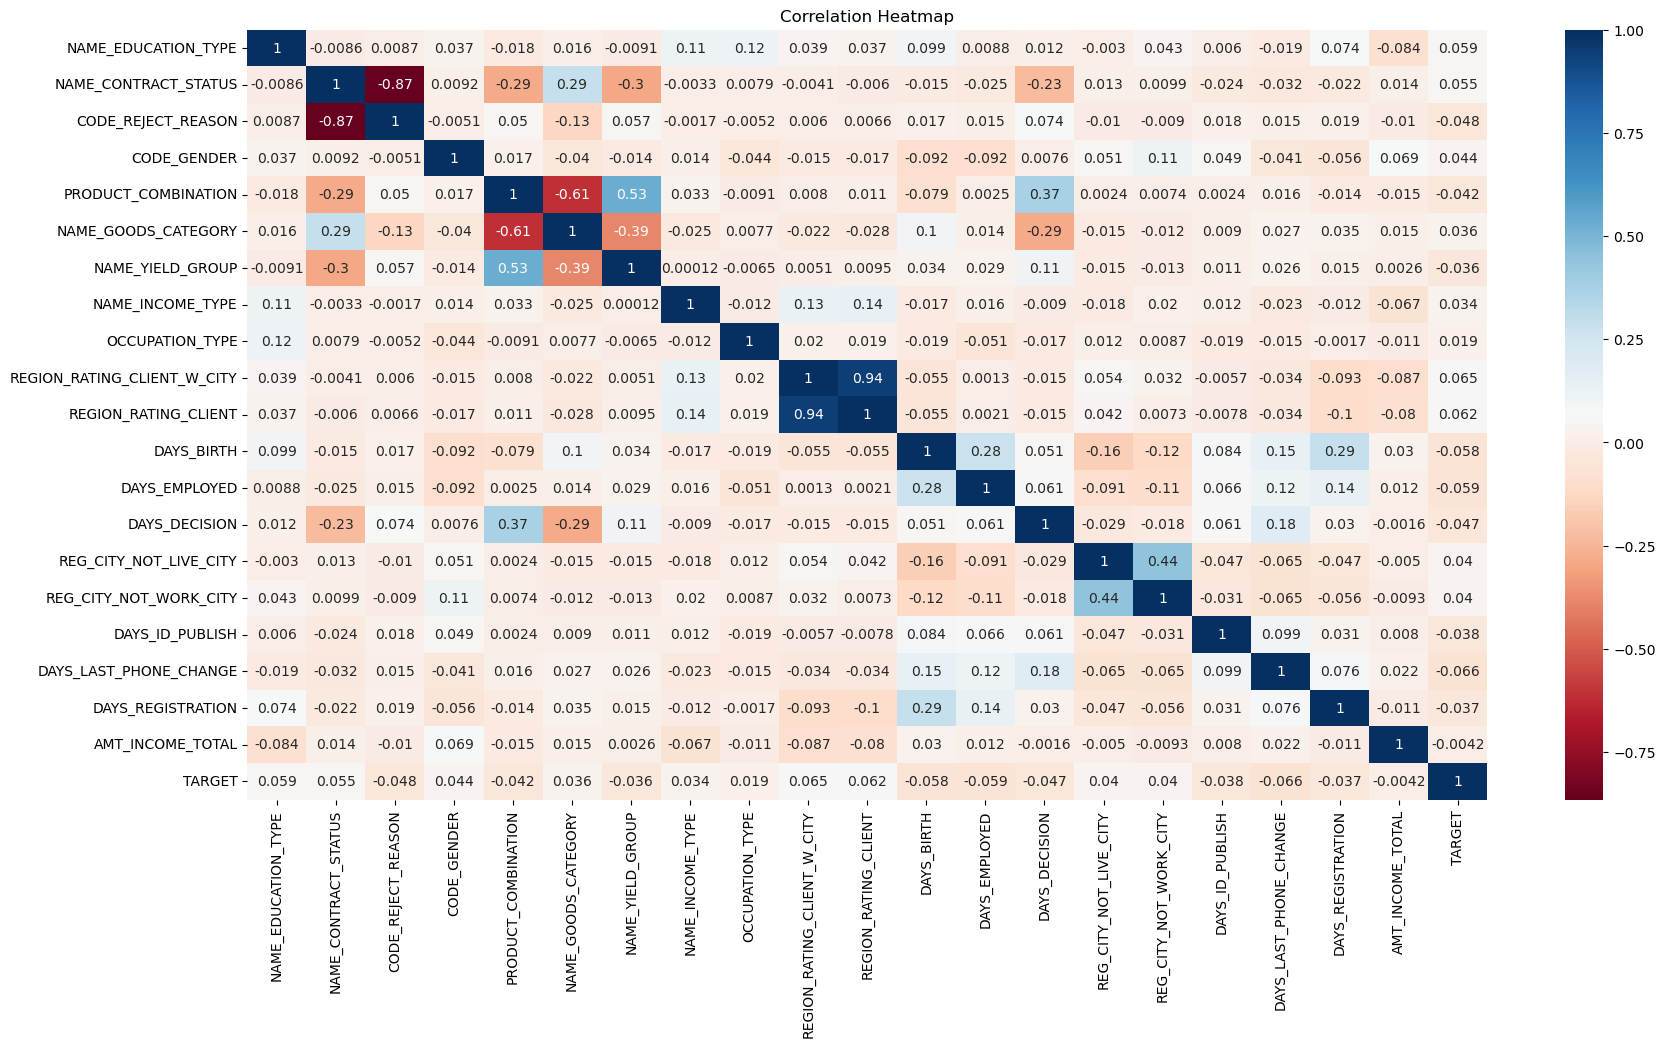

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = Final_df.corr()
plt.figure(figsize=(20, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMatrix, 
    xticklabels=corrMatrix.columns,
    yticklabels=corrMatrix.columns,
    cmap='RdBu', 
    annot=True
)


In [90]:
import scipy.stats as stats

# Initialize an empty dictionary to store p-values
results = []

# Iterate over each pair of columns
for col1 in Final_df.columns:
    for col2 in Final_df.columns:
        if col1 != col2:  # Avoid calculating correlation for the same column
            # Calculate correlation coefficient and p-value
            r, p = stats.pearsonr(Final_df[col1], Final_df[col2])
            results.append((col1, col2, p, r))
            
# Convert the list of results into a DataFrame
results_df = pd.DataFrame(results, columns=['column1', 'column2', 'pvalue', 'r'])
results_df

,column1,column2,pvalue,r
0,NAME_EDUCATION_TYPE,NAME_CONTRACT_STATUS,5.644872e-17,-0.008562
1,NAME_EDUCATION_TYPE,CODE_REJECT_REASON,2.633452e-17,0.008654
2,NAME_EDUCATION_TYPE,CODE_GENDER,5.782048e-294,0.037462
3,NAME_EDUCATION_TYPE,PRODUCT_COMBINATION,1.253957e-68,-0.017903
4,NAME_EDUCATION_TYPE,NAME_GOODS_CATEGORY,1.172178e-56,0.016220
...,...,...,...,...
415,TARGET,REG_CITY_NOT_WORK_CITY,0.000000e+00,0.039949
416,TARGET,DAYS_ID_PUBLISH,4.494621e-306,-0.038231
417,TARGET,DAYS_LAST_PHONE_CHANGE,0.000000e+00,-0.065755
418,TARGET,DAYS_REGISTRATION,1.372646e-291,-0.037309


In [91]:
results_df1=results_df[(results_df['pvalue']<0.05) & (results_df['r']>0.4 )]
results_df1

,column1,column2,pvalue,r
85,PRODUCT_COMBINATION,NAME_YIELD_GROUP,0.0,0.528370
124,NAME_YIELD_GROUP,PRODUCT_COMBINATION,0.0,0.528370
189,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.0,0.943769
209,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.0,0.943769
294,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,0.0,0.444173
314,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.0,0.444173


In [92]:
Final_dff = Final_df.drop(columns=['REGION_RATING_CLIENT', 'REG_CITY_NOT_LIVE_CITY',
'PRODUCT_COMBINATION'])

In [93]:
Final_dff.shape

(956121, 18)

In [94]:
Final_dff.columns

Index(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_DECISION',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'TARGET'],
      dtype='object')

In [95]:
Final_dff.isnull().sum()

NAME_EDUCATION_TYPE            0
NAME_CONTRACT_STATUS           0
CODE_REJECT_REASON             0
CODE_GENDER                    0
NAME_GOODS_CATEGORY            0
NAME_YIELD_GROUP               0
NAME_INCOME_TYPE               0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT_W_CITY    0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_DECISION                  0
REG_CITY_NOT_WORK_CITY         0
DAYS_ID_PUBLISH                0
DAYS_LAST_PHONE_CHANGE         0
DAYS_REGISTRATION              0
AMT_INCOME_TOTAL               0
TARGET                         0
dtype: int64

In [96]:
Final_dff.dtypes

NAME_EDUCATION_TYPE              int32
NAME_CONTRACT_STATUS             int32
CODE_REJECT_REASON               int32
CODE_GENDER                      int32
NAME_GOODS_CATEGORY              int32
NAME_YIELD_GROUP                 int32
NAME_INCOME_TYPE                 int32
OCCUPATION_TYPE                  int32
REGION_RATING_CLIENT_W_CITY      int64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_DECISION                    int64
REG_CITY_NOT_WORK_CITY           int64
DAYS_ID_PUBLISH                  int64
DAYS_LAST_PHONE_CHANGE         float64
DAYS_REGISTRATION              float64
AMT_INCOME_TOTAL               float64
TARGET                           int64
dtype: object

In [97]:
Final_dff.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,956121.0,3.213458,1.285423,0.0,2.0,4.0,4.0,4.0
NAME_CONTRACT_STATUS,956121.0,0.585239,0.840389,0.0,0.0,0.0,1.0,3.0
CODE_REJECT_REASON,956121.0,5.963233,2.193976,0.0,7.0,7.0,7.0,8.0
CODE_GENDER,956121.0,0.376686,0.484618,0.0,0.0,0.0,1.0,2.0
NAME_GOODS_CATEGORY,956121.0,19.019708,8.850809,0.0,11.0,26.0,26.0,26.0
NAME_YIELD_GROUP,956121.0,1.793946,1.579239,0.0,0.0,1.0,3.0,4.0
NAME_INCOME_TYPE,956121.0,3.441786,2.207390,0.0,0.0,5.0,5.0,5.0
OCCUPATION_TYPE,956121.0,7.928290,4.424132,0.0,4.0,8.0,11.0,17.0
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988,0.489597,1.0,2.0,2.0,2.0,3.0
DAYS_BIRTH,956121.0,14961.033096,3612.126372,7489.0,12011.0,14785.0,17667.0,25200.0


In [97]:
Final_dff

,NAME_EDUCATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CODE_GENDER,NAME_GOODS_CATEGORY,NAME_YIELD_GROUP,NAME_INCOME_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_DECISION,REG_CITY_NOT_WORK_CITY,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,AMT_INCOME_TOTAL,TARGET
0,4,0,7,1,24,3,5,8,2,9461,637,606,0,2120,1134.0,3648.0,202500.0,1
1,1,0,7,0,26,3,3,3,1,16765,1188,746,0,291,828.0,1186.0,270000.0,0
2,1,0,7,0,11,4,3,3,1,16765,1188,828,0,291,828.0,1186.0,270000.0,0
3,1,0,7,0,7,4,3,3,1,16765,1188,2341,0,291,828.0,1186.0,270000.0,0
4,4,0,7,1,18,4,5,8,2,19046,225,815,0,2531,815.0,4260.0,67500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1,0,7,0,26,4,0,8,1,16856,1262,648,1,410,787.0,5128.0,157500.0,0
1413697,1,2,1,0,26,0,0,8,1,16856,1262,456,1,410,787.0,5128.0,157500.0,0
1413698,1,2,1,0,26,3,0,8,1,16856,1262,171,1,410,787.0,5128.0,157500.0,0
1413699,1,0,7,0,26,3,0,8,1,16856,1262,787,1,410,787.0,5128.0,157500.0,0


# Skewness Handling - Feature Scaling (Log Transformation)

In [98]:
def skewplot(df, column):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
        
    plt.subplot(1,3,3)
    sns.kdeplot(data=df, x=column, shade=True)
    plt.title(f'KDE Plot for {column}')
    
    plt.tight_layout()
    plt.show()

In [121]:
Final_df2 = Final_dff.copy()

In [122]:
Final_df2.shape

(956121, 18)

In [123]:
Final_df2.isnull().sum()

NAME_EDUCATION_TYPE            0
NAME_CONTRACT_STATUS           0
CODE_REJECT_REASON             0
CODE_GENDER                    0
NAME_GOODS_CATEGORY            0
NAME_YIELD_GROUP               0
NAME_INCOME_TYPE               0
OCCUPATION_TYPE                0
REGION_RATING_CLIENT_W_CITY    0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_DECISION                  0
REG_CITY_NOT_WORK_CITY         0
DAYS_ID_PUBLISH                0
DAYS_LAST_PHONE_CHANGE         0
DAYS_REGISTRATION              0
AMT_INCOME_TOTAL               0
TARGET                         0
dtype: int64

In [124]:
Final_df2.columns

Index(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_DECISION',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'TARGET'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


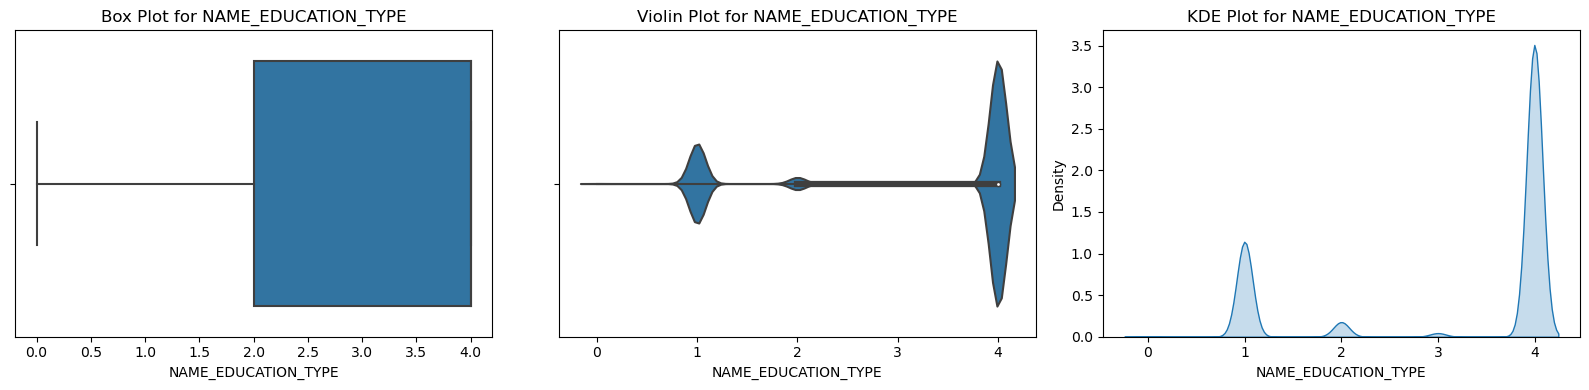

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


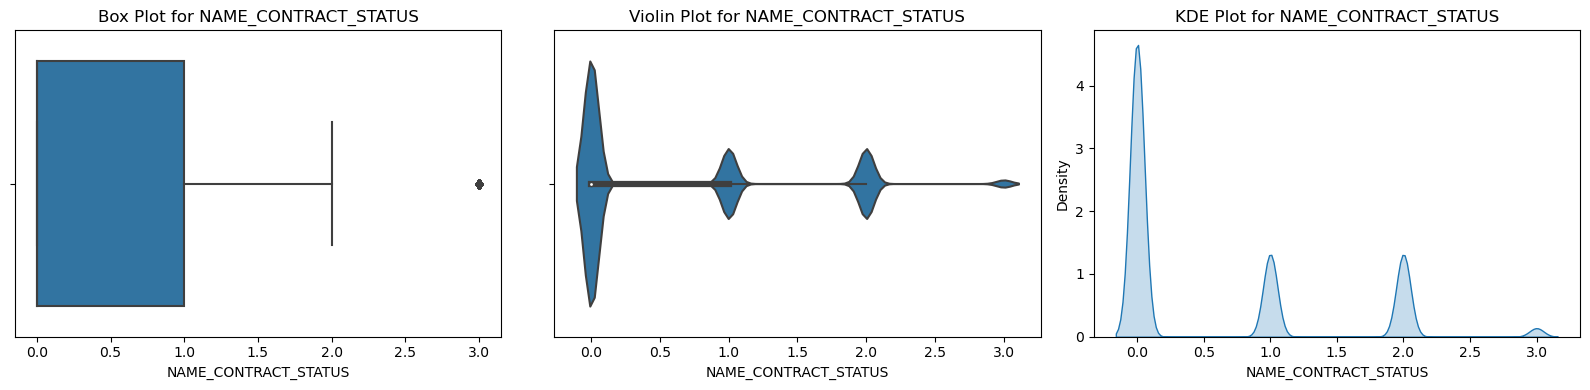

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


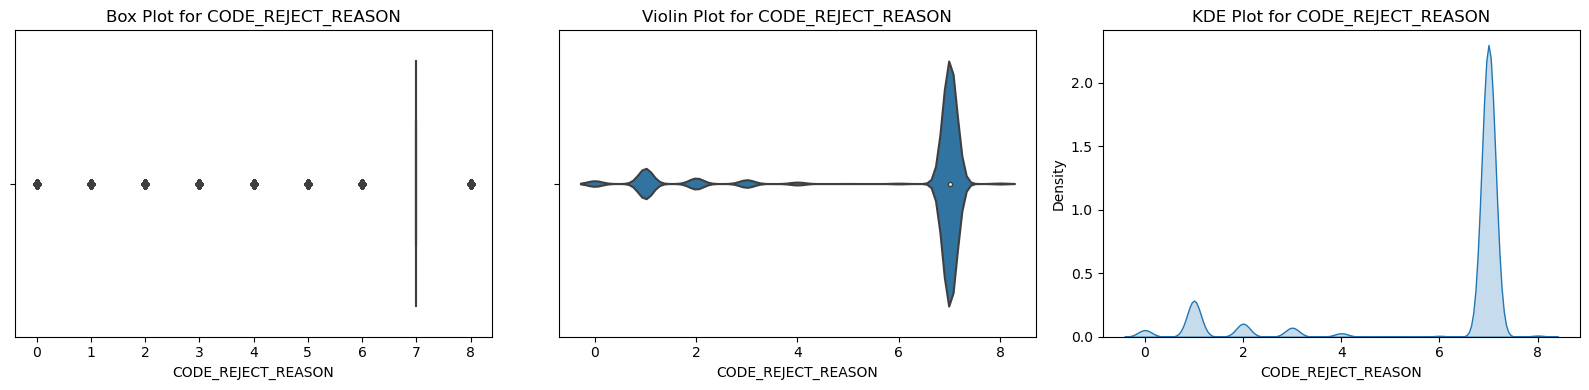

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


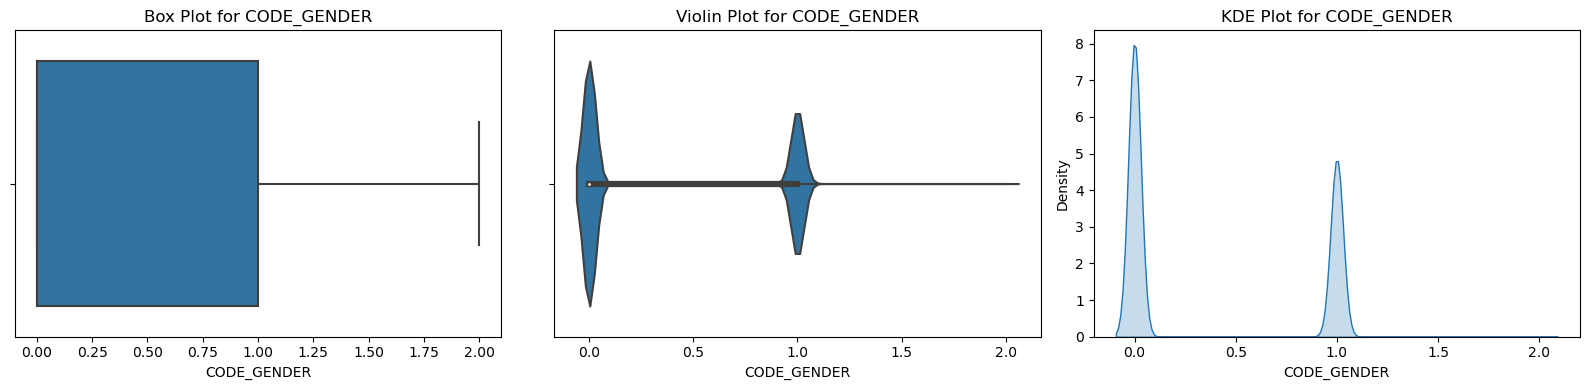

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


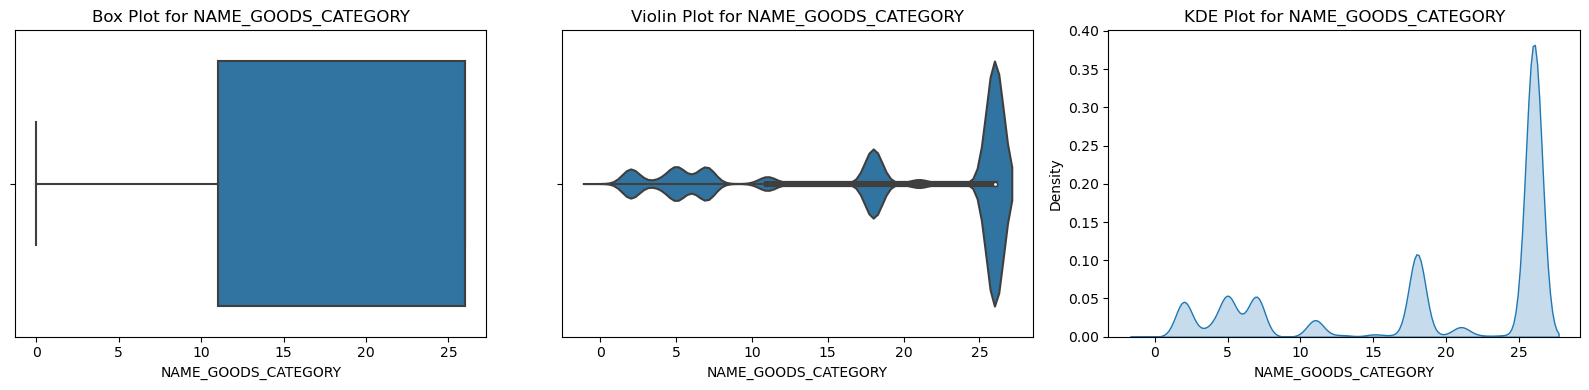

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


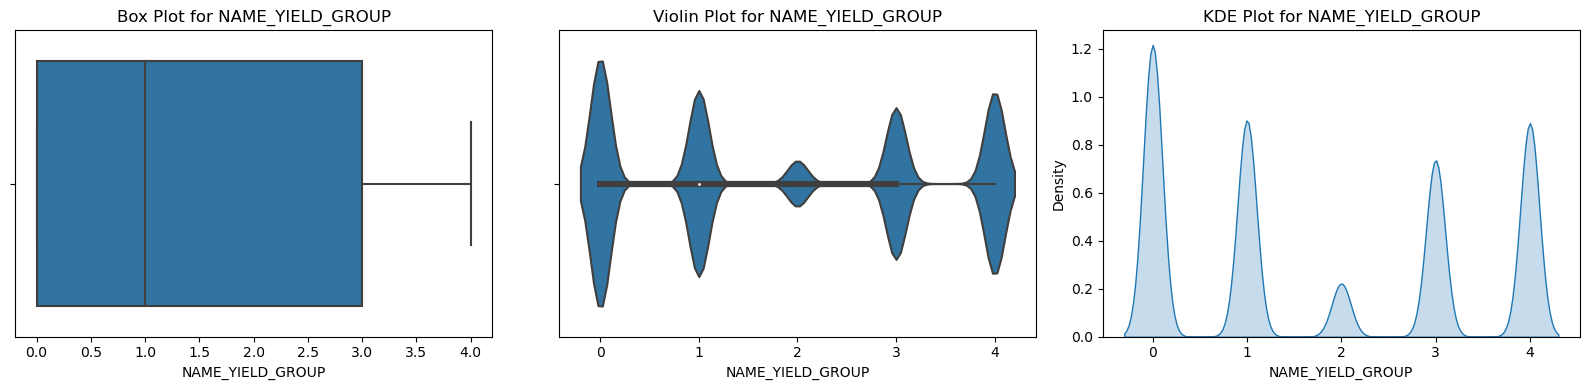

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


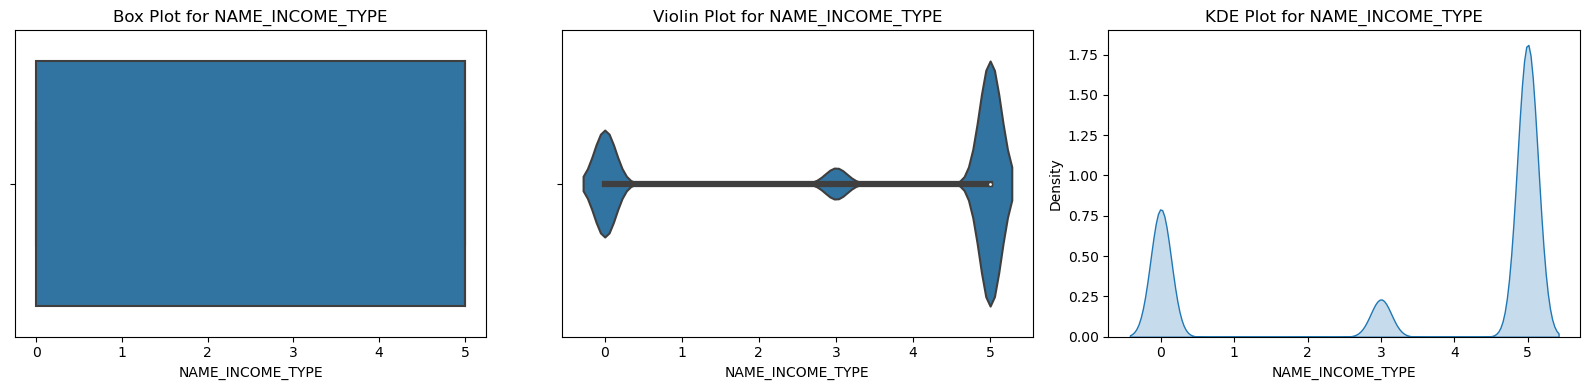

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


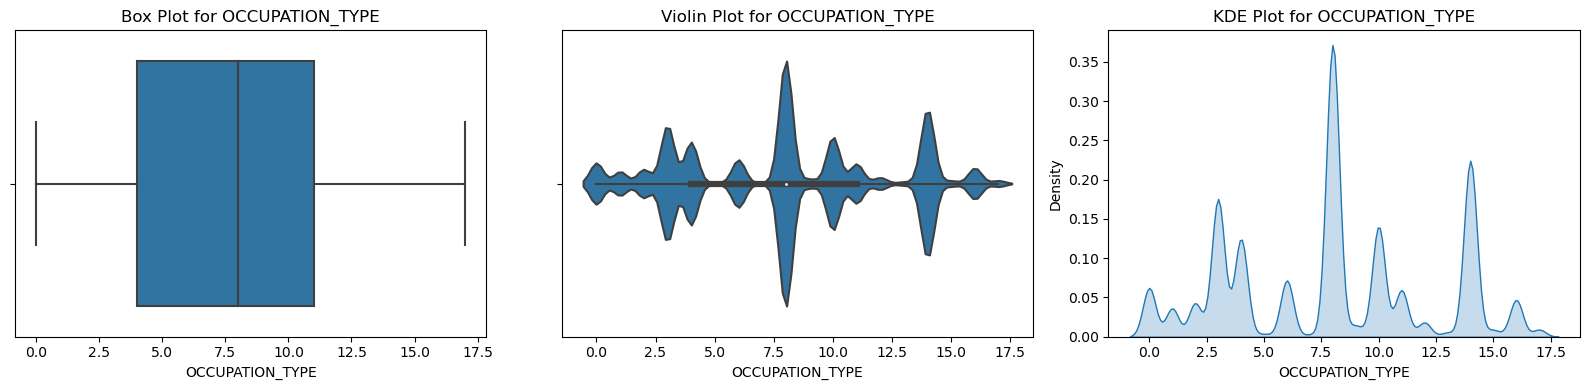

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


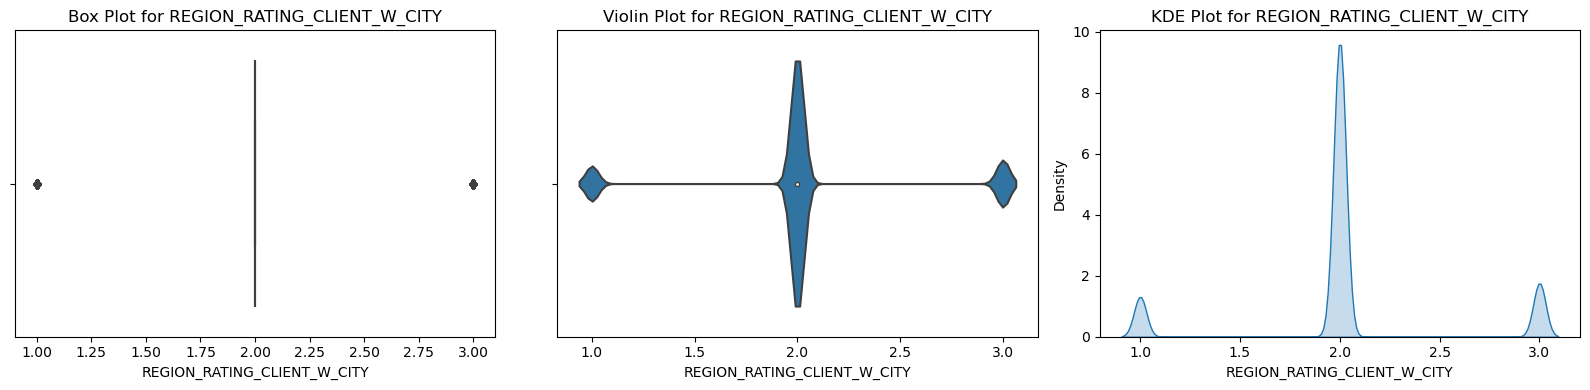

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


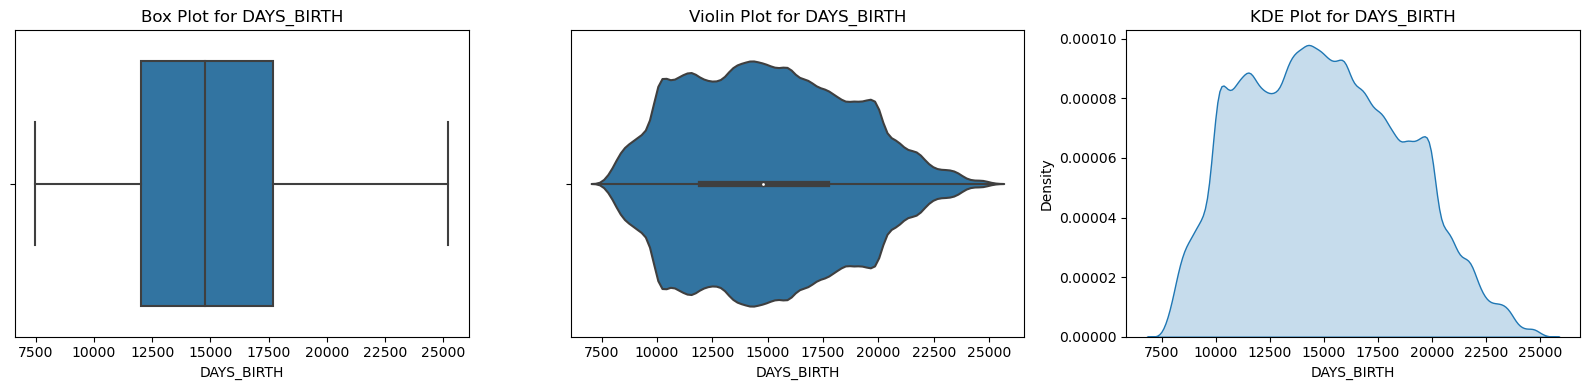

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


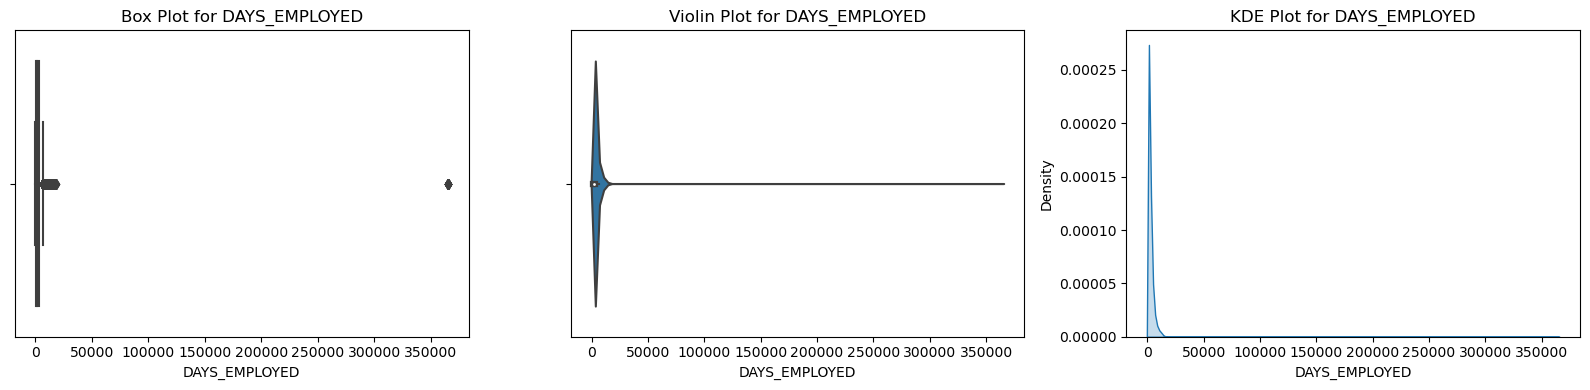

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


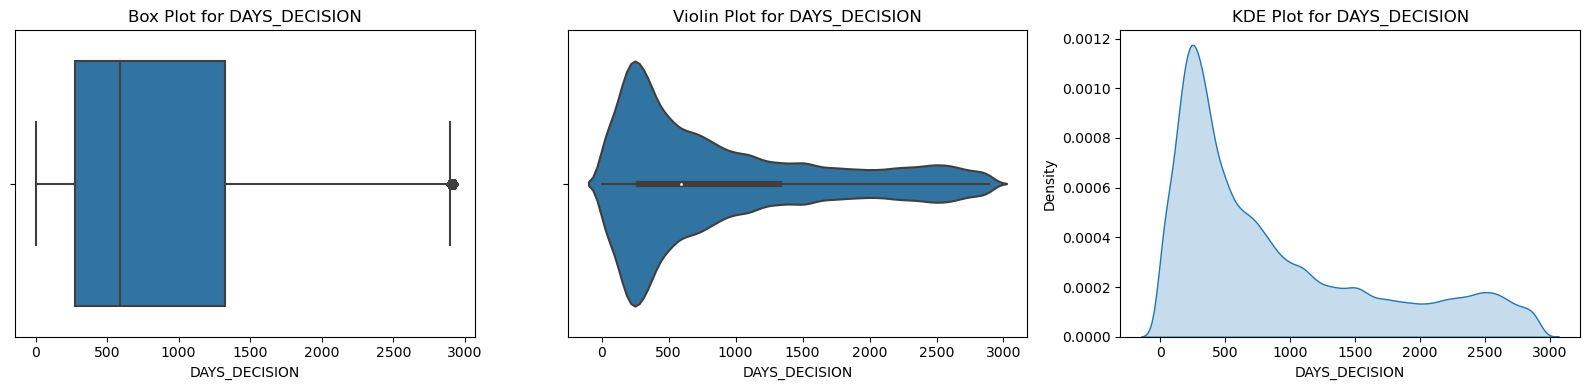

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


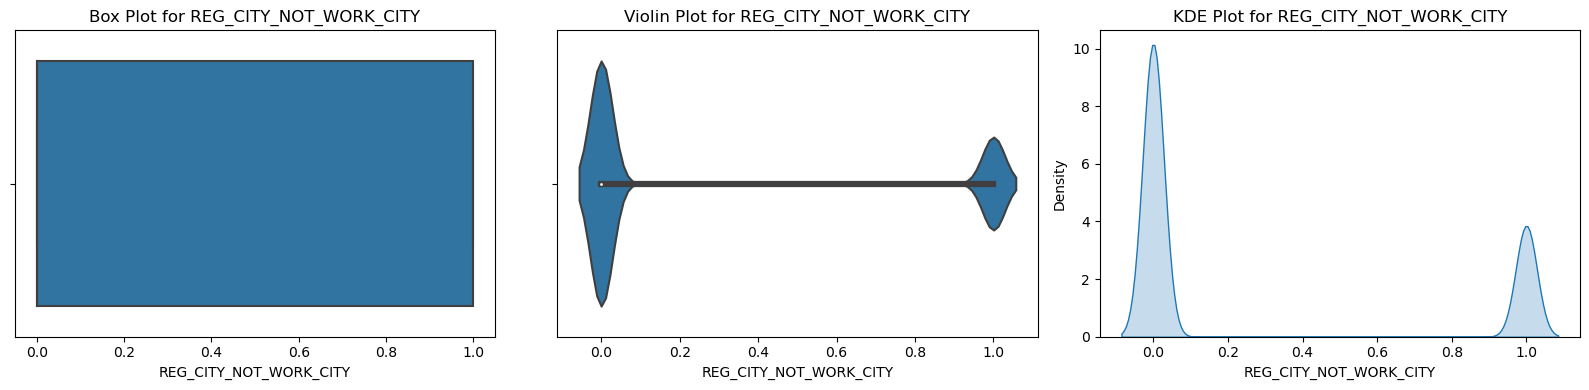

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


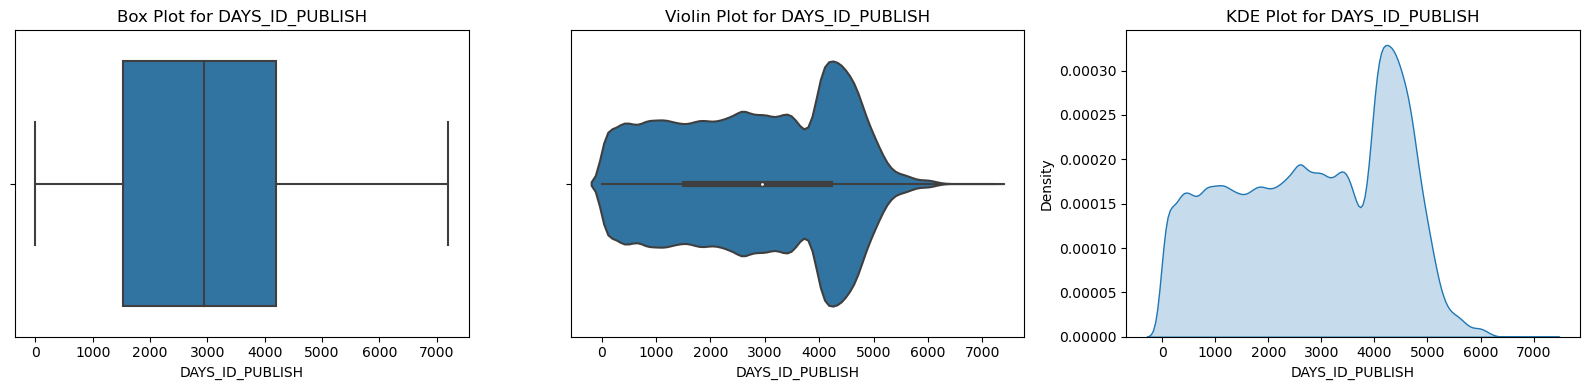

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


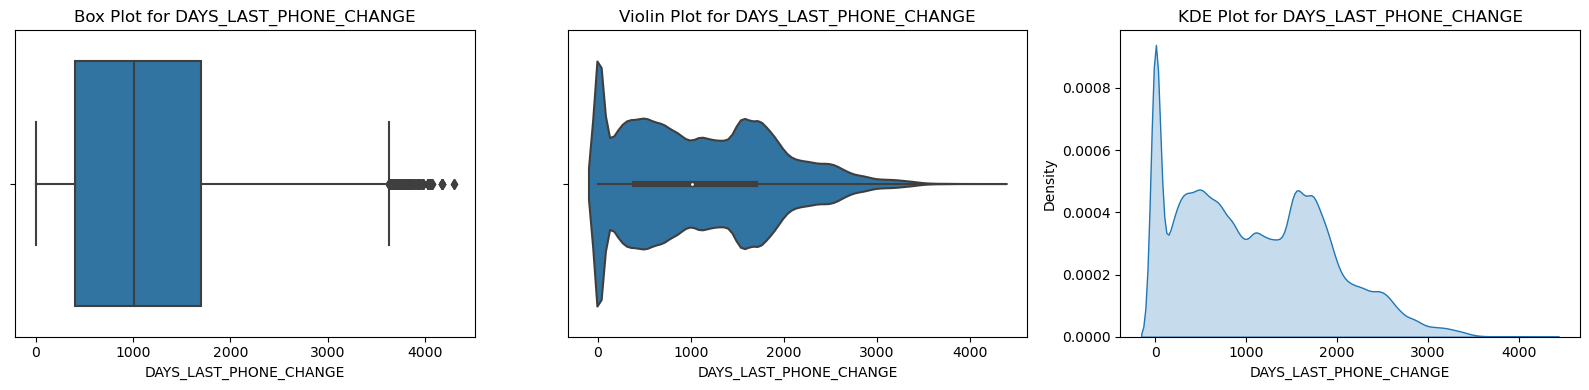

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


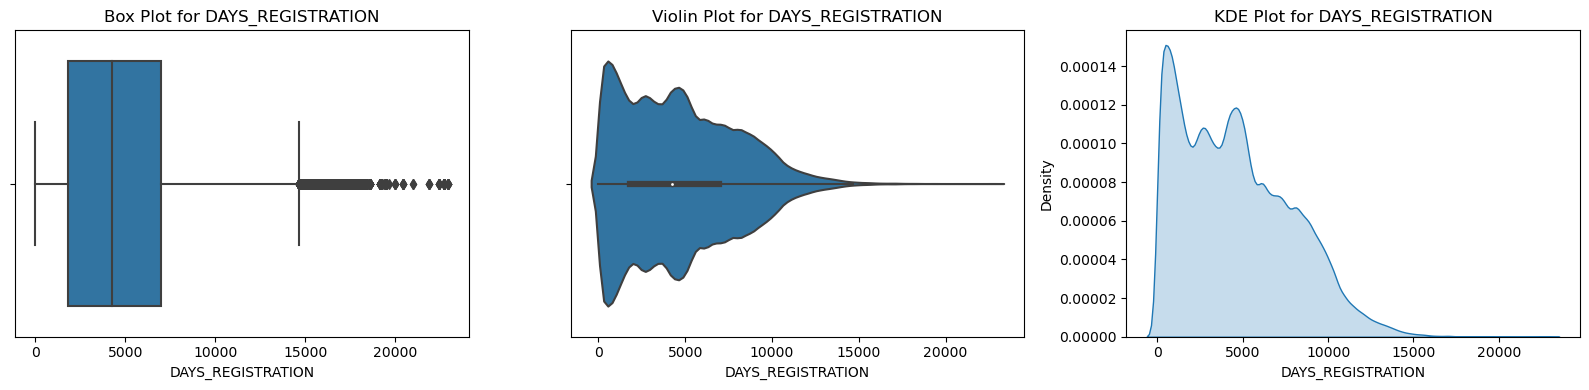

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


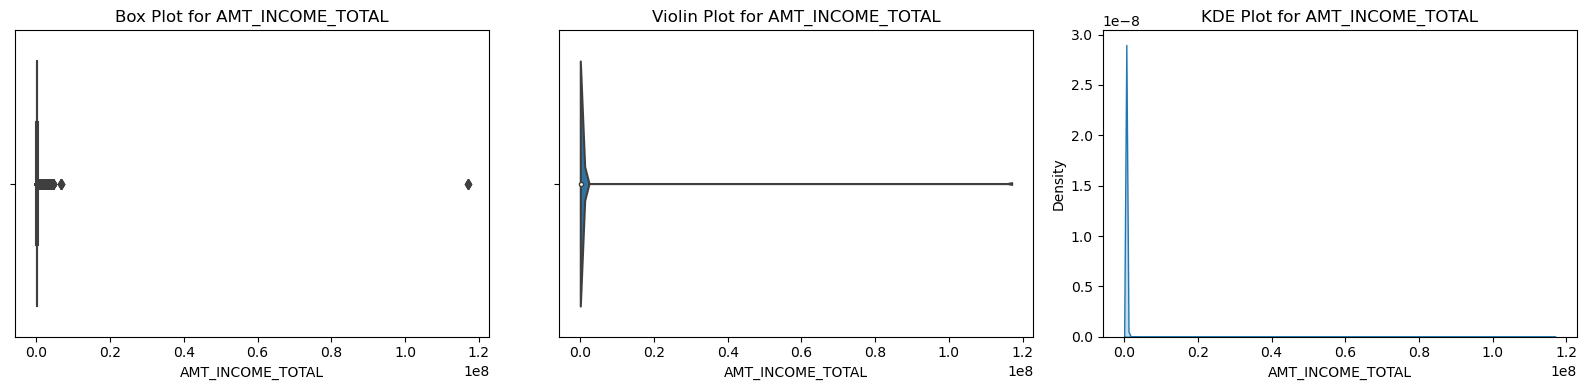

C:\Users\Admin\AppData\Local\Temp\ipykernel_13316\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


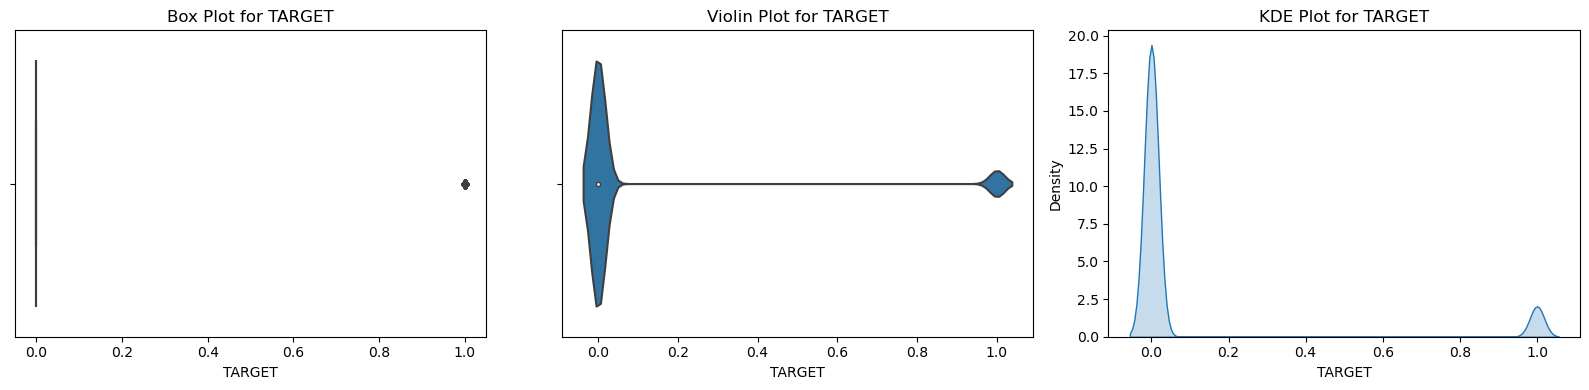

In [104]:
skewed_columns= ['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_DECISION',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'TARGET']
 
for column in skewed_columns:
    skewplot(Final_df1, column)

In [125]:
Final_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,956121.0,3.213458,1.285423,0.0,2.0,4.0,4.0,4.0
NAME_CONTRACT_STATUS,956121.0,0.585239,0.840389,0.0,0.0,0.0,1.0,3.0
CODE_REJECT_REASON,956121.0,5.963233,2.193976,0.0,7.0,7.0,7.0,8.0
CODE_GENDER,956121.0,0.376686,0.484618,0.0,0.0,0.0,1.0,2.0
NAME_GOODS_CATEGORY,956121.0,19.019708,8.850809,0.0,11.0,26.0,26.0,26.0
NAME_YIELD_GROUP,956121.0,1.793946,1.579239,0.0,0.0,1.0,3.0,4.0
NAME_INCOME_TYPE,956121.0,3.441786,2.207390,0.0,0.0,5.0,5.0,5.0
OCCUPATION_TYPE,956121.0,7.928290,4.424132,0.0,4.0,8.0,11.0,17.0
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988,0.489597,1.0,2.0,2.0,2.0,3.0
DAYS_BIRTH,956121.0,14961.033096,3612.126372,7489.0,12011.0,14785.0,17667.0,25200.0


In [106]:
#With respect to the above plots and Formula, skewed columns were processed

# Log Transformation to handle skewed Data

In [126]:
def apply_transformation(df, columns):
    for column in columns:
        df[f'{column}_log'] = np.log(df[column]+1)  # Adding 1 to avoid log(0)
    return df

In [127]:
Log_Columns = ['AMT_INCOME_TOTAL','DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED']

In [105]:
#Log_Columns = ['AMT_INCOME_TOTAL','DAYS_EMPLOYED']

In [128]:
Log_columns_tr = apply_transformation(Final_df2, Log_Columns)

In [129]:
Final_df2.columns

Index(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_DECISION',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'TARGET',
       'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log', 'DAYS_EMPLOYED_log'],
      dtype='object')

In [146]:
Final_df2["DAYS_LAST_PHONE_CHANGE_lg"] = np.log(Final_df2["DAYS_LAST_PHONE_CHANGE"])
Final_df2["DAYS_ID_PUBLISH_lg"] = np.log(Final_df2["DAYS_ID_PUBLISH"])
Final_df2["DAYS_REGISTRATION_lg"] = np.log(Final_df2["DAYS_REGISTRATION"])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [147]:
Final_df2.columns

Index(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_DECISION',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'TARGET',
       'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log', 'DAYS_EMPLOYED_log',
       'DAYS_LAST_PHONE_CHANGE_lg', 'DAYS_ID_PUBLISH_lg',
       'DAYS_REGISTRATION_lg'],
      dtype='object')

In [148]:
Final_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,956121.0,3.213458e+00,1.285423,0.000000e+00,2.000000,4.000000,4.000000,4.000000e+00
NAME_CONTRACT_STATUS,956121.0,5.852387e-01,0.840389,0.000000e+00,0.000000,0.000000,1.000000,3.000000e+00
CODE_REJECT_REASON,956121.0,5.963233e+00,2.193976,0.000000e+00,7.000000,7.000000,7.000000,8.000000e+00
CODE_GENDER,956121.0,3.766856e-01,0.484618,0.000000e+00,0.000000,0.000000,1.000000,2.000000e+00
NAME_GOODS_CATEGORY,956121.0,1.901971e+01,8.850809,0.000000e+00,11.000000,26.000000,26.000000,2.600000e+01
NAME_YIELD_GROUP,956121.0,1.793946e+00,1.579239,0.000000e+00,0.000000,1.000000,3.000000,4.000000e+00
NAME_INCOME_TYPE,956121.0,3.441786e+00,2.207390,0.000000e+00,0.000000,5.000000,5.000000,5.000000e+00
OCCUPATION_TYPE,956121.0,7.928290e+00,4.424132,0.000000e+00,4.000000,8.000000,11.000000,1.700000e+01
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988e+00,0.489597,1.000000e+00,2.000000,2.000000,2.000000,3.000000e+00
DAYS_BIRTH,956121.0,1.496103e+04,3612.126372,7.489000e+03,12011.000000,14785.000000,17667.000000,2.520000e+04


C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


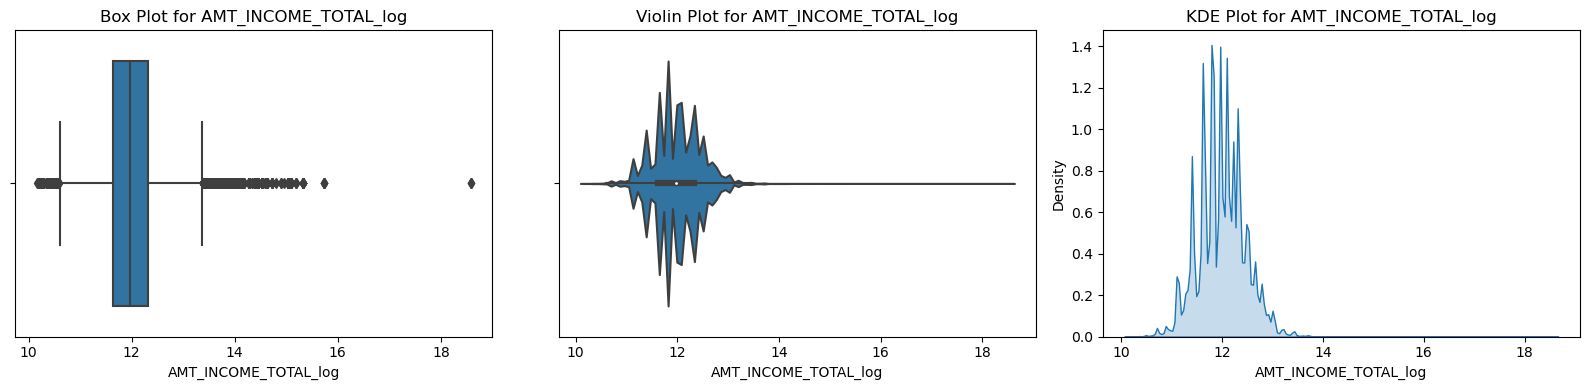

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


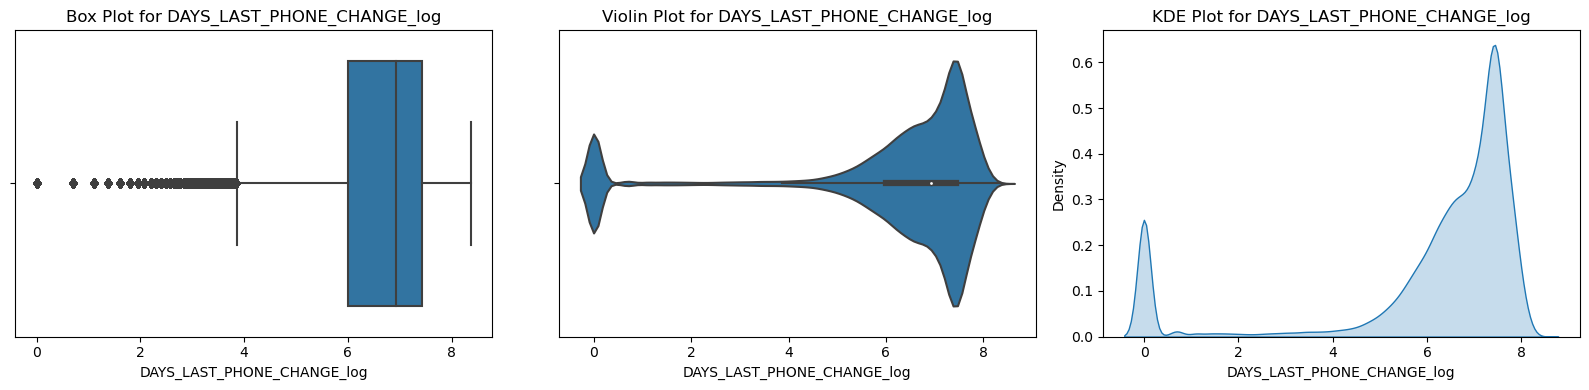

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


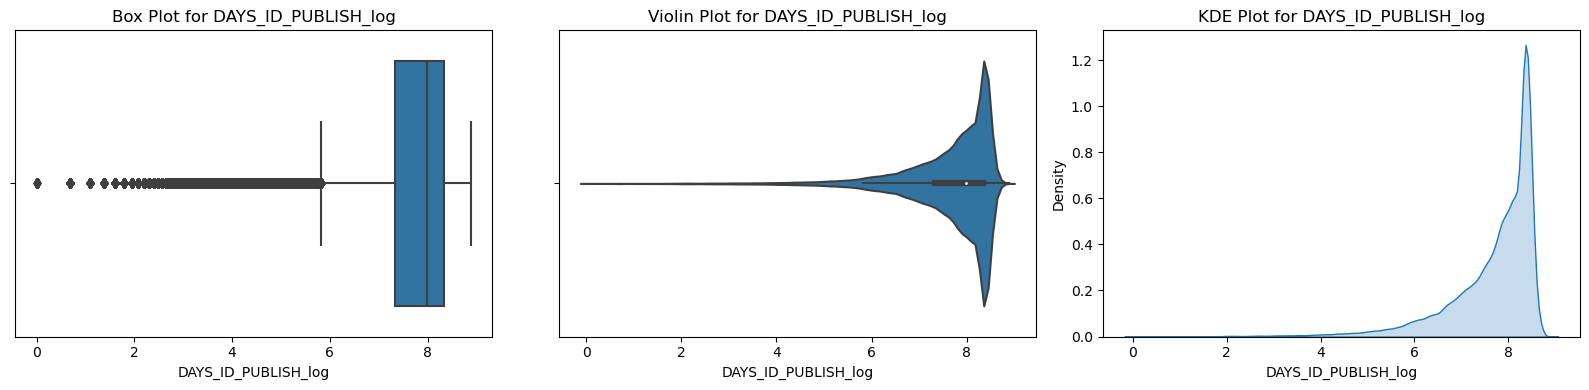

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


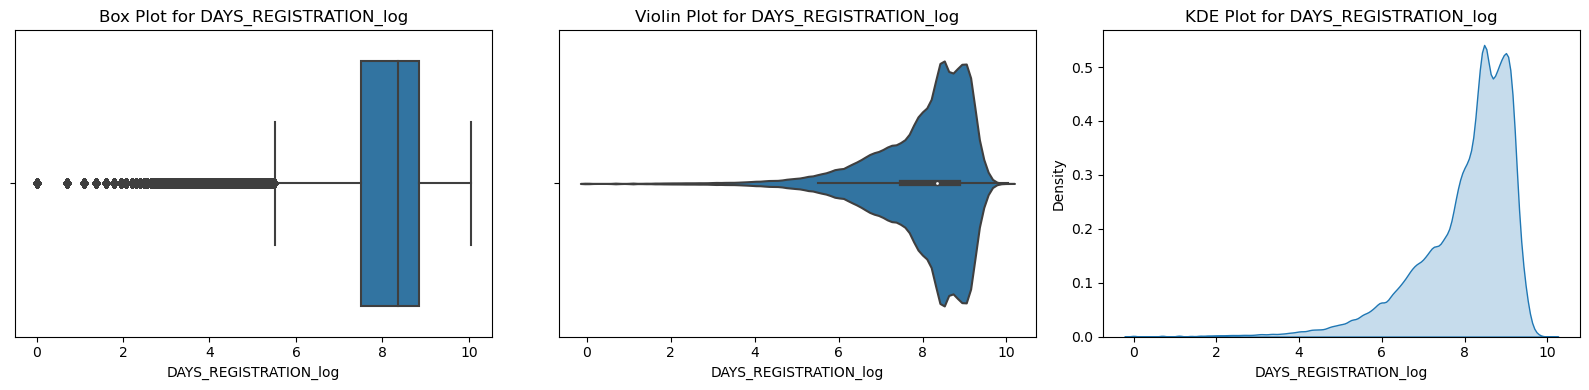

C:\Users\Admin\AppData\Local\Temp\ipykernel_7716\2545697755.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, shade=True)


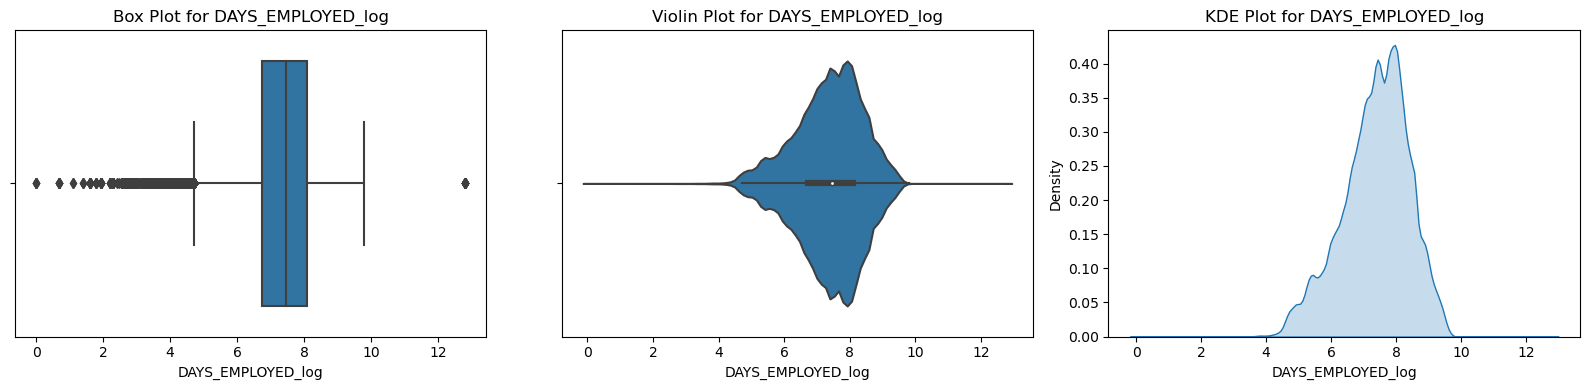

In [149]:
log_col_tr = ['AMT_INCOME_TOTAL_log','DAYS_LAST_PHONE_CHANGE_log', 'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log', 'DAYS_EMPLOYED_log']
for i in log_col_tr:
  skewplot(Final_df2,i)

In [150]:
Final_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,956121.0,3.213458e+00,1.285423,0.000000e+00,2.000000,4.000000,4.000000,4.000000e+00
NAME_CONTRACT_STATUS,956121.0,5.852387e-01,0.840389,0.000000e+00,0.000000,0.000000,1.000000,3.000000e+00
CODE_REJECT_REASON,956121.0,5.963233e+00,2.193976,0.000000e+00,7.000000,7.000000,7.000000,8.000000e+00
CODE_GENDER,956121.0,3.766856e-01,0.484618,0.000000e+00,0.000000,0.000000,1.000000,2.000000e+00
NAME_GOODS_CATEGORY,956121.0,1.901971e+01,8.850809,0.000000e+00,11.000000,26.000000,26.000000,2.600000e+01
NAME_YIELD_GROUP,956121.0,1.793946e+00,1.579239,0.000000e+00,0.000000,1.000000,3.000000,4.000000e+00
NAME_INCOME_TYPE,956121.0,3.441786e+00,2.207390,0.000000e+00,0.000000,5.000000,5.000000,5.000000e+00
OCCUPATION_TYPE,956121.0,7.928290e+00,4.424132,0.000000e+00,4.000000,8.000000,11.000000,1.700000e+01
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988e+00,0.489597,1.000000e+00,2.000000,2.000000,2.000000,3.000000e+00
DAYS_BIRTH,956121.0,1.496103e+04,3612.126372,7.489000e+03,12011.000000,14785.000000,17667.000000,2.520000e+04


In [151]:
def outlier(df, columns):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (1.5 * iqr)
        lower_threshold = q1 - (1.5 * iqr)
        
        # Clip the outliers
        df[column] = df[column].clip(lower=lower_threshold, upper=upper_threshold)
    
    return df

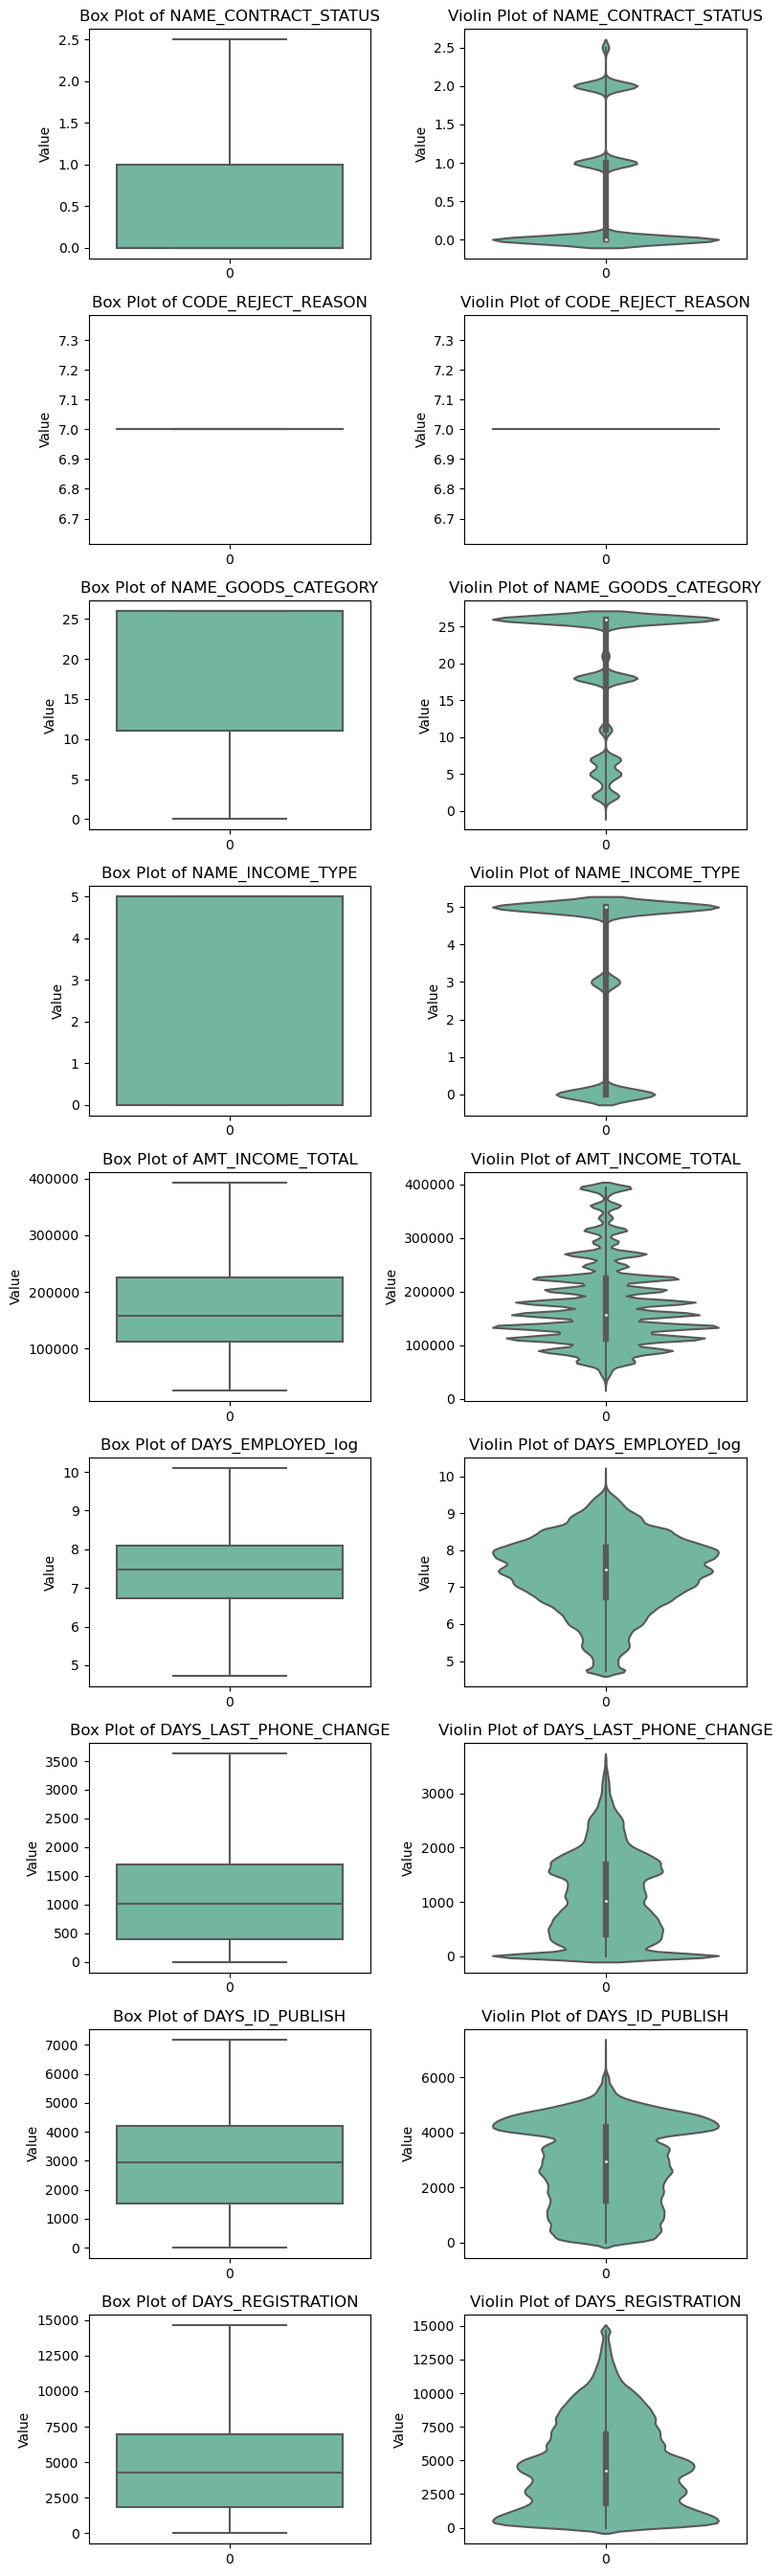

In [153]:
Outlier_Columns =['NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NAME_GOODS_CATEGORY',
                  'NAME_INCOME_TYPE','AMT_INCOME_TOTAL', 'DAYS_EMPLOYED_log',
                  'DAYS_LAST_PHONE_CHANGE','DAYS_ID_PUBLISH','DAYS_REGISTRATION']

# Remove outliers using the IQR method
df2 = outlier(Final_df2, Outlier_Columns)

plt.figure(figsize=(8, len(Outlier_Columns) * 3))  # Adjust the figure size

# Iterate through each column and create a box plot and a violin plot in separate rows
for i, column in enumerate(Outlier_Columns):
    # Box Plot
    plt.subplot(len(Outlier_Columns), 2, i * 2 + 1)
    sns.boxplot(data=df2[column], orient="v", palette="Set2")
    plt.title(f'Box Plot of {column}')
    plt.ylabel("Value")
    
    # Violin Plot
    plt.subplot(len(Outlier_Columns), 2, i * 2 + 2)
    sns.violinplot(data=df2[column], orient="v", palette="Set2")
    plt.title(f'Violin Plot of {column}')
    plt.ylabel("Value")

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

In [154]:
Final_df2

,NAME_EDUCATION_TYPE,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,CODE_GENDER,NAME_GOODS_CATEGORY,NAME_YIELD_GROUP,NAME_INCOME_TYPE,OCCUPATION_TYPE,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,...,AMT_INCOME_TOTAL,TARGET,AMT_INCOME_TOTAL_log,DAYS_LAST_PHONE_CHANGE_log,DAYS_ID_PUBLISH_log,DAYS_REGISTRATION_log,DAYS_EMPLOYED_log,DAYS_LAST_PHONE_CHANGE_lg,DAYS_ID_PUBLISH_lg,DAYS_REGISTRATION_lg
0,4,0.0,7,1,24,3,5,8,2,9461,...,202500.0,1,12.218500,7.034388,7.659643,8.202208,6.458338,7.033506,7.659171,8.201934
1,1,0.0,7,0,26,3,3,3,1,16765,...,270000.0,0,12.506181,6.720220,5.676754,7.079184,7.080868,6.719013,5.673323,7.078342
2,1,0.0,7,0,11,4,3,3,1,16765,...,270000.0,0,12.506181,6.720220,5.676754,7.079184,7.080868,6.719013,5.673323,7.078342
3,1,0.0,7,0,7,4,3,3,1,16765,...,270000.0,0,12.506181,6.720220,5.676754,7.079184,7.080868,6.719013,5.673323,7.078342
4,4,0.0,7,1,18,4,5,8,2,19046,...,67500.0,0,11.119898,6.704414,7.836765,8.357259,5.420535,6.703188,7.836370,8.357024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,1,0.0,7,0,26,4,0,8,1,16856,...,157500.0,0,11.967187,6.669498,6.018593,8.542666,7.141245,6.668228,6.016157,8.542471
1413697,1,2.0,7,0,26,0,0,8,1,16856,...,157500.0,0,11.967187,6.669498,6.018593,8.542666,7.141245,6.668228,6.016157,8.542471
1413698,1,2.0,7,0,26,3,0,8,1,16856,...,157500.0,0,11.967187,6.669498,6.018593,8.542666,7.141245,6.668228,6.016157,8.542471
1413699,1,0.0,7,0,26,3,0,8,1,16856,...,157500.0,0,11.967187,6.669498,6.018593,8.542666,7.141245,6.668228,6.016157,8.542471


In [155]:
Final_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,956121.0,3.213458e+00,1.285423,0.000000e+00,2.000000,4.000000,4.000000,4.000000
NAME_CONTRACT_STATUS,956121.0,5.760495e-01,0.816324,0.000000e+00,0.000000,0.000000,1.000000,2.500000
CODE_REJECT_REASON,956121.0,7.000000e+00,0.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
CODE_GENDER,956121.0,3.766856e-01,0.484618,0.000000e+00,0.000000,0.000000,1.000000,2.000000
NAME_GOODS_CATEGORY,956121.0,1.901971e+01,8.850809,0.000000e+00,11.000000,26.000000,26.000000,26.000000
NAME_YIELD_GROUP,956121.0,1.793946e+00,1.579239,0.000000e+00,0.000000,1.000000,3.000000,4.000000
NAME_INCOME_TYPE,956121.0,3.441786e+00,2.207390,0.000000e+00,0.000000,5.000000,5.000000,5.000000
OCCUPATION_TYPE,956121.0,7.928290e+00,4.424132,0.000000e+00,4.000000,8.000000,11.000000,17.000000
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988e+00,0.489597,1.000000e+00,2.000000,2.000000,2.000000,3.000000
DAYS_BIRTH,956121.0,1.496103e+04,3612.126372,7.489000e+03,12011.000000,14785.000000,17667.000000,25200.000000


In [156]:
Final_df3 = Final_df2.copy()

In [157]:
Final_df3.columns

Index(['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON',
       'CODE_GENDER', 'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP',
       'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_DECISION',
       'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL', 'TARGET',
       'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log', 'DAYS_EMPLOYED_log',
       'DAYS_LAST_PHONE_CHANGE_lg', 'DAYS_ID_PUBLISH_lg',
       'DAYS_REGISTRATION_lg'],
      dtype='object')

In [158]:
Final_df3.shape

(956121, 26)

In [159]:
Final_df3.describe().T

,count,mean,std,min,25%,50%,75%,max
NAME_EDUCATION_TYPE,956121.0,3.213458e+00,1.285423,0.000000e+00,2.000000,4.000000,4.000000,4.000000
NAME_CONTRACT_STATUS,956121.0,5.760495e-01,0.816324,0.000000e+00,0.000000,0.000000,1.000000,2.500000
CODE_REJECT_REASON,956121.0,7.000000e+00,0.000000,7.000000e+00,7.000000,7.000000,7.000000,7.000000
CODE_GENDER,956121.0,3.766856e-01,0.484618,0.000000e+00,0.000000,0.000000,1.000000,2.000000
NAME_GOODS_CATEGORY,956121.0,1.901971e+01,8.850809,0.000000e+00,11.000000,26.000000,26.000000,26.000000
NAME_YIELD_GROUP,956121.0,1.793946e+00,1.579239,0.000000e+00,0.000000,1.000000,3.000000,4.000000
NAME_INCOME_TYPE,956121.0,3.441786e+00,2.207390,0.000000e+00,0.000000,5.000000,5.000000,5.000000
OCCUPATION_TYPE,956121.0,7.928290e+00,4.424132,0.000000e+00,4.000000,8.000000,11.000000,17.000000
REGION_RATING_CLIENT_W_CITY,956121.0,2.034988e+00,0.489597,1.000000e+00,2.000000,2.000000,2.000000,3.000000
DAYS_BIRTH,956121.0,1.496103e+04,3612.126372,7.489000e+03,12011.000000,14785.000000,17667.000000,25200.000000


In [160]:
#Final_df3.to_csv(r"D:\Guvi_Data_Science\MDT33\Capstone_Project\Final_Project\Final_new.csv")

In [123]:

#Final_df4 = pd.read_csv("D:\Guvi_Data_Science\MDT33\Capstone_Project\Final_Project\Final_df3.csv")

In [162]:

#Final_new = pd.read_csv("D:\Guvi_Data_Science\MDT33\Capstone_Project\Final_Project\Final_new.csv")

# Feature Engineering

In [163]:
# 1. Extract age from DAYS_BIRTH
Final_new['AGE'] = Final_new['DAYS_BIRTH'] / -365

In [164]:
Final_new['AGE'] = Final_new['AGE'].abs()

In [165]:
Final_new['AGE'].isnull().sum()

0

In [166]:
Final_new['INCOME_PA'] = Final_new['AMT_INCOME_TOTAL']*12

In [167]:
# Group by income_type and income_percentile_bin
grouped_df = Final_new.groupby(['NAME_INCOME_TYPE', 'INCOME_PA']).size().reset_index(name='count')
grouped_df


,NAME_INCOME_TYPE,INCOME_PA,count
0,0,318600.0,2
1,0,324000.0,4
2,0,351000.0,1
3,0,378000.0,27
4,0,405000.0,1
...,...,...,...
1758,5,4590000.0,1730
1759,5,4637682.0,21
1760,5,4644000.0,195
1761,5,4698000.0,143


In [168]:
grouped_df.max()

NAME_INCOME_TYPE          5.0
INCOME_PA           4725000.0
count                 75818.0
dtype: float64

In [173]:
Final_new['CLIENT_RATING'] = pd.cut(Final_new['REGION_RATING_CLIENT_W_CITY'], bins=[0,1,2,3], labels=['Low', 'Medium', 'High'])

In [174]:
Final_new['REGION_RATING_CLIENT_W_CITY'].unique()

array([2, 1, 3], dtype=int64)

In [175]:
Final_new['CLIENT_RATING_W_CITY'] =  Final_new['CLIENT_RATING'].map({'Low': 1, 'Medium': 2, 'High': 3})

In [176]:
Final_new['CLIENT_RATING_W_CITY'].unique()

[2, 1, 3]
Categories (3, int64): [1 < 2 < 3]

In [177]:
Final_new['CLIENT_RATING_W_CITY'] = Final_new['CLIENT_RATING_W_CITY'].astype(int)
Final_new['AGE'] = Final_new['AGE'].astype(int)

In [178]:
Final_new.columns

Index(['Unnamed: 0', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'CODE_GENDER', 'NAME_GOODS_CATEGORY',
       'NAME_YIELD_GROUP', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_DECISION', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL',
       'TARGET', 'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log', 'DAYS_EMPLOYED_log',
       'DAYS_LAST_PHONE_CHANGE_lg', 'DAYS_ID_PUBLISH_lg',
       'DAYS_REGISTRATION_lg', 'AGE', 'INCOME_PA', 'CLIENT_RATING',
       'CLIENT_RATING_W_CITY'],
      dtype='object')

In [179]:
Final_new.dtypes

Unnamed: 0                        int64
NAME_EDUCATION_TYPE               int64
NAME_CONTRACT_STATUS            float64
CODE_REJECT_REASON                int64
CODE_GENDER                       int64
NAME_GOODS_CATEGORY               int64
NAME_YIELD_GROUP                  int64
NAME_INCOME_TYPE                  int64
OCCUPATION_TYPE                   int64
REGION_RATING_CLIENT_W_CITY       int64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_DECISION                     int64
REG_CITY_NOT_WORK_CITY            int64
DAYS_ID_PUBLISH                   int64
DAYS_LAST_PHONE_CHANGE          float64
DAYS_REGISTRATION               float64
AMT_INCOME_TOTAL                float64
TARGET                            int64
AMT_INCOME_TOTAL_log            float64
DAYS_LAST_PHONE_CHANGE_log      float64
DAYS_ID_PUBLISH_log             float64
DAYS_REGISTRATION_log           float64
DAYS_EMPLOYED_log               float64
DAYS_LAST_PHONE_CHANGE_lg       float64


In [252]:
Final_new.columns

Index(['Unnamed: 0', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'CODE_GENDER', 'NAME_GOODS_CATEGORY',
       'NAME_YIELD_GROUP', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_DECISION', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL',
       'TARGET', 'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log', 'DAYS_EMPLOYED_log',
       'DAYS_LAST_PHONE_CHANGE_lg', 'DAYS_ID_PUBLISH_lg',
       'DAYS_REGISTRATION_lg', 'AGE', 'INCOME_PA', 'CLIENT_RATING',
       'CLIENT_RATING_W_CITY'],
      dtype='object')

In [180]:
Final_new.shape

(956121, 31)

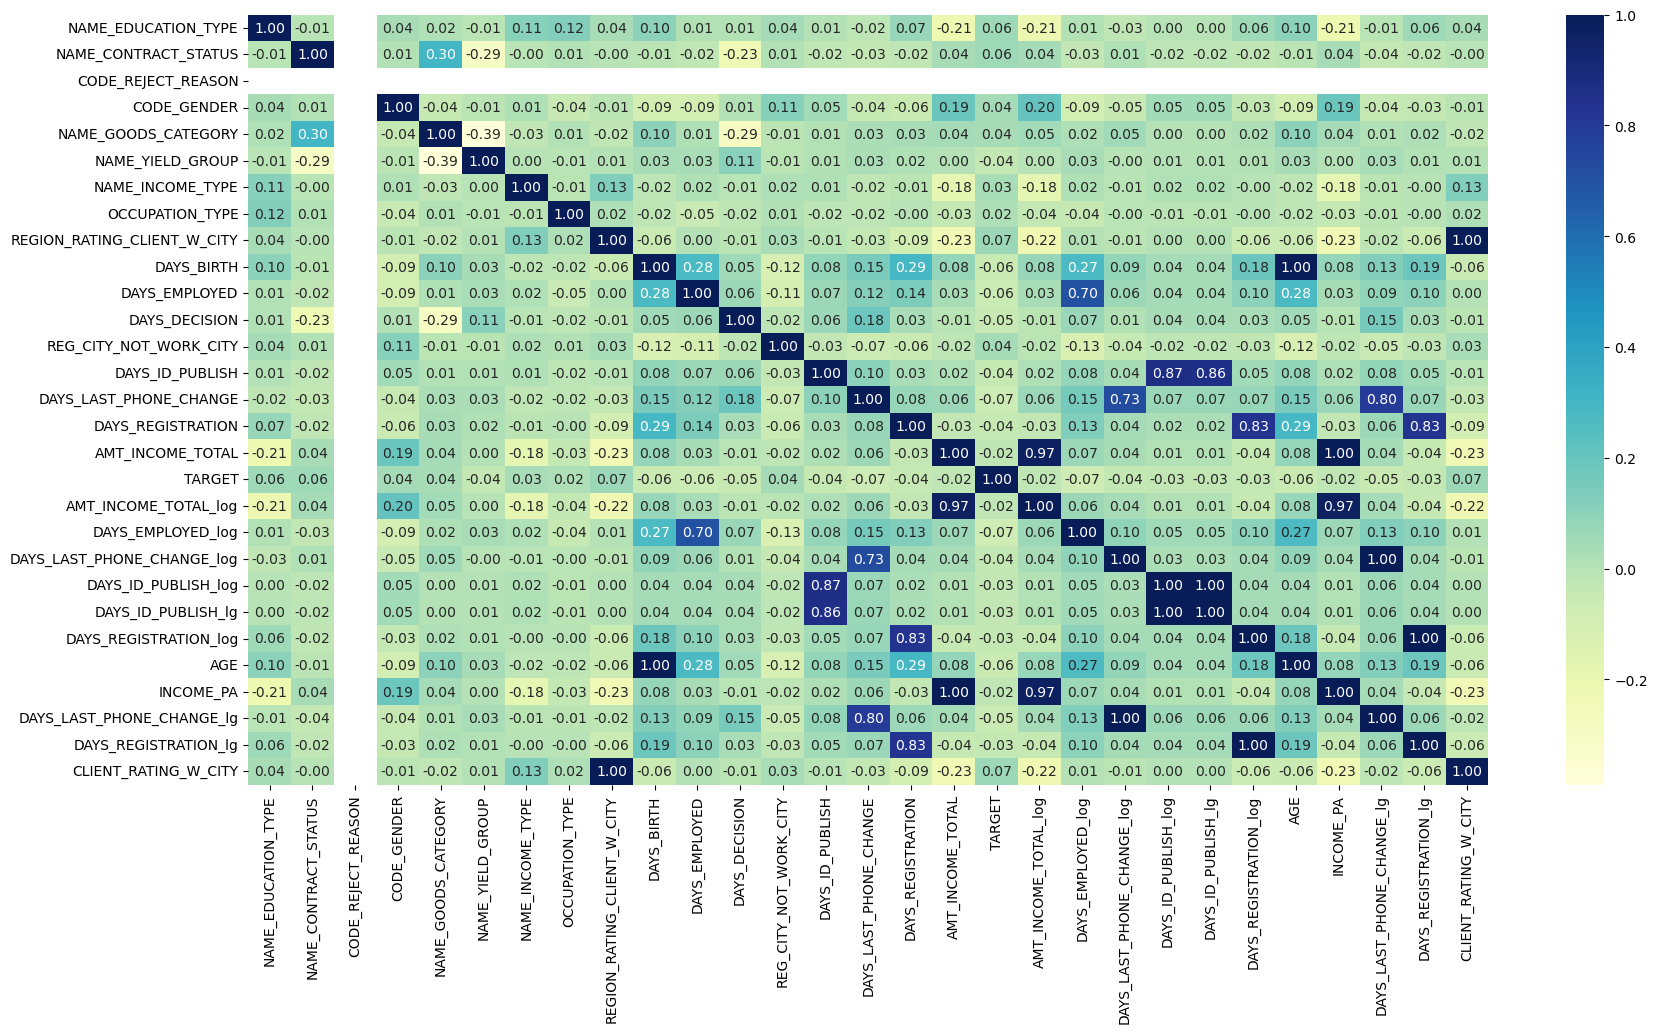

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

dff = Final_new[['NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'CODE_GENDER',
       'NAME_GOODS_CATEGORY', 'NAME_YIELD_GROUP', 'NAME_INCOME_TYPE',
       'OCCUPATION_TYPE', 'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_DECISION', 'REG_CITY_NOT_WORK_CITY',
       'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION',
       'AMT_INCOME_TOTAL', 'TARGET',
       'AMT_INCOME_TOTAL_log', 'DAYS_EMPLOYED_log',
       'DAYS_LAST_PHONE_CHANGE_log', 'DAYS_ID_PUBLISH_log', 'DAYS_ID_PUBLISH_lg',
       'DAYS_REGISTRATION_log', 'AGE', 'INCOME_PA', 'DAYS_LAST_PHONE_CHANGE_lg', 'DAYS_REGISTRATION_lg',
       'CLIENT_RATING_W_CITY']]

# Calculate the correlation matrix
corr = dff.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, fmt=".2f",cmap="YlGnBu")
plt.show()

In [182]:
Final_new.columns

Index(['Unnamed: 0', 'NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS',
       'CODE_REJECT_REASON', 'CODE_GENDER', 'NAME_GOODS_CATEGORY',
       'NAME_YIELD_GROUP', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE',
       'REGION_RATING_CLIENT_W_CITY', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_DECISION', 'REG_CITY_NOT_WORK_CITY', 'DAYS_ID_PUBLISH',
       'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'AMT_INCOME_TOTAL',
       'TARGET', 'AMT_INCOME_TOTAL_log', 'DAYS_LAST_PHONE_CHANGE_log',
       'DAYS_ID_PUBLISH_log', 'DAYS_REGISTRATION_log', 'DAYS_EMPLOYED_log',
       'DAYS_LAST_PHONE_CHANGE_lg', 'DAYS_ID_PUBLISH_lg',
       'DAYS_REGISTRATION_lg', 'AGE', 'INCOME_PA', 'CLIENT_RATING',
       'CLIENT_RATING_W_CITY'],
      dtype='object')

# Split train and test data

In [183]:
final_data = Final_new[['TARGET','OCCUPATION_TYPE','NAME_EDUCATION_TYPE',
                   'NAME_INCOME_TYPE','INCOME_PA','CODE_REJECT_REASON',
                   'NAME_CONTRACT_STATUS','NAME_YIELD_GROUP',
                    'CODE_GENDER','AGE','CLIENT_RATING_W_CITY',
                    'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
                    'DAYS_REGISTRATION','DAYS_EMPLOYED_log']]


In [184]:
final_data1 = Final_new[['TARGET','OCCUPATION_TYPE','NAME_EDUCATION_TYPE',
                   'NAME_INCOME_TYPE','INCOME_PA','CODE_REJECT_REASON',
                         'NAME_CONTRACT_STATUS','NAME_YIELD_GROUP',
                    'CODE_GENDER','AGE','CLIENT_RATING_W_CITY',
                    'DAYS_LAST_PHONE_CHANGE_lg', 'DAYS_ID_PUBLISH_lg',
                    'DAYS_REGISTRATION_lg']]

In [185]:
final_data2 = Final_new[['TARGET','OCCUPATION_TYPE','NAME_EDUCATION_TYPE',
                   'NAME_INCOME_TYPE','INCOME_PA','CODE_REJECT_REASON',
                         'NAME_CONTRACT_STATUS','NAME_YIELD_GROUP',
                    'CODE_GENDER','AGE','CLIENT_RATING_W_CITY',
                    'DAYS_LAST_PHONE_CHANGE_log', 'DAYS_ID_PUBLISH_log',
                    'DAYS_REGISTRATION_log']]

In [187]:
final_data1.shape

(956121, 14)

In [188]:
final_data1

,TARGET,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,INCOME_PA,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_YIELD_GROUP,CODE_GENDER,AGE,CLIENT_RATING_W_CITY,DAYS_LAST_PHONE_CHANGE_lg,DAYS_ID_PUBLISH_lg,DAYS_REGISTRATION_lg
0,1,8,4,5,2430000.0,7,0.0,3,1,25,2,7.033506,7.659171,8.201934
1,0,3,1,3,3240000.0,7,0.0,3,0,45,1,6.719013,5.673323,7.078342
2,0,3,1,3,3240000.0,7,0.0,4,0,45,1,6.719013,5.673323,7.078342
3,0,3,1,3,3240000.0,7,0.0,4,0,45,1,6.719013,5.673323,7.078342
4,0,8,4,5,810000.0,7,0.0,4,1,52,2,6.703188,7.836370,8.357024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956116,0,8,1,0,1890000.0,7,0.0,4,0,46,1,6.668228,6.016157,8.542471
956117,0,8,1,0,1890000.0,7,2.0,0,0,46,1,6.668228,6.016157,8.542471
956118,0,8,1,0,1890000.0,7,2.0,3,0,46,1,6.668228,6.016157,8.542471
956119,0,8,1,0,1890000.0,7,0.0,3,0,46,1,6.668228,6.016157,8.542471


In [189]:
final_data1['TARGET'].value_counts()

TARGET
0    865635
1     90486
Name: count, dtype: int64

In [201]:
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import RandomOverSampler

ro = RandomOverSampler(random_state= 46)

features = final_data.drop('TARGET',axis=1)
target = final_data['TARGET']

re_data, re_tar = ro.fit_resample(features, target)
re_data['TARGET'] = re_tar 

val = re_data.drop('TARGET', axis=1)
tar = re_data['TARGET']

X_train, X_test, y_train, y_test  = train_test_split(val, tar, test_size= 0.2, random_state=46)

X_train = X_train.clip(lower=-1e10, upper=1e10)
X_test = X_test.clip(lower=-1e10, upper=1e10)


print("Training data shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("Testing data shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training data shapes:
X_train: (1385016, 14)
y_train: (1385016,)
Testing data shapes:
X_test: (346254, 14)
y_test: (346254,)


In [202]:
re_data['TARGET'].value_counts()

TARGET
1    865635
0    865635
Name: count, dtype: int64

In [203]:
re_data.shape

(1731270, 15)

# DecisionTree Classifier

In [204]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


scaler1 = StandardScaler()
X1_train_scaled = scaler1.fit_transform(X_train)
X1_test_scaled = scaler1.transform(X_test)

Decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=30,
    min_samples_split=6,
    min_samples_leaf=6
)

# Fit the classifier
Decision_tree.fit(X1_train_scaled, y_train)

# Predict the labels
y_pred = Decision_tree.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9527254558792101
Confusion Matrix:
[[159692  13536]
 [  2833 170193]]


Confusion Matrix:
[[159692  13536]
 [  2833 170193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    173228
           1       0.93      0.98      0.95    173026

    accuracy                           0.95    346254
   macro avg       0.95      0.95      0.95    346254
weighted avg       0.95      0.95      0.95    346254



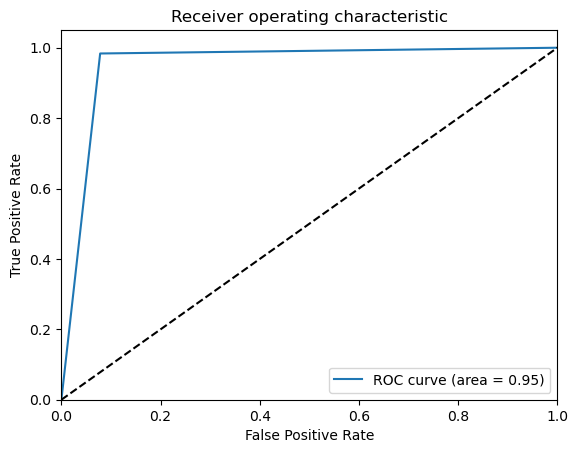

In [205]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
false, true, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')                                           #  DECISON TREE
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# KNeighborsClassifier

In [206]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler0 = StandardScaler()
X1_train_scaled = scaler0.fit_transform(X_train)
X1_test_scaled = scaler0.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X1_train_scaled, y_train)

# Predict the labels
y_pred_k = knn.predict(X1_test_scaled)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred_k)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred_k)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9319488005914733
Confusion Matrix:
[[150177  23051]
 [   512 172514]]


Confusion Matrix:
[[150177  23051]
 [   512 172514]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    173228
           1       0.88      1.00      0.94    173026

    accuracy                           0.93    346254
   macro avg       0.94      0.93      0.93    346254
weighted avg       0.94      0.93      0.93    346254



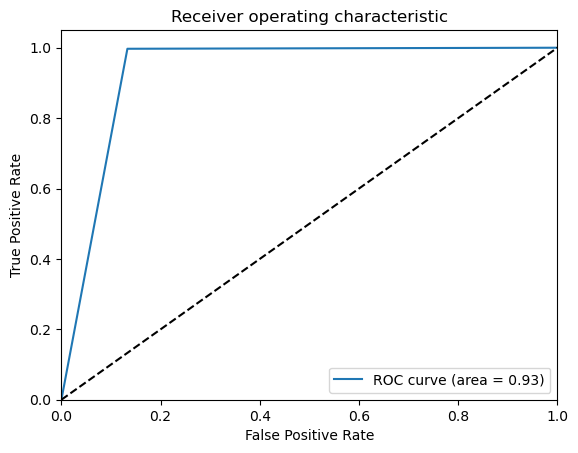

In [207]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_k))
print("Classification Report:")
print(classification_report(y_test, y_pred_k))
false, true, thresholds = roc_curve(y_test, y_pred_k)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# RandomForest Classifier

In [209]:
from sklearn.ensemble import RandomForestClassifier    # random forest
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
XR_train_scaled = scaler2.fit_transform(X_train)
XR_test_scaled = scaler2.transform(X_test)

random_forest = RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    min_samples_split=16,
    min_samples_leaf=9,
    criterion='gini',
    max_features='sqrt'
)

# Fit
random_forest.fit(XR_train_scaled, y_train)

# Predict
y_pred_rf = random_forest.predict(XR_test_scaled)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(f"Confusion Matrix:\n{cm_rf}")

Accuracy: 0.9481825480716468
Confusion Matrix:
[[159267  13961]
 [  3981 169045]]


Confusion Matrix:
[[159267  13961]
 [  3981 169045]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    173228
           1       0.92      0.98      0.95    173026

    accuracy                           0.95    346254
   macro avg       0.95      0.95      0.95    346254
weighted avg       0.95      0.95      0.95    346254



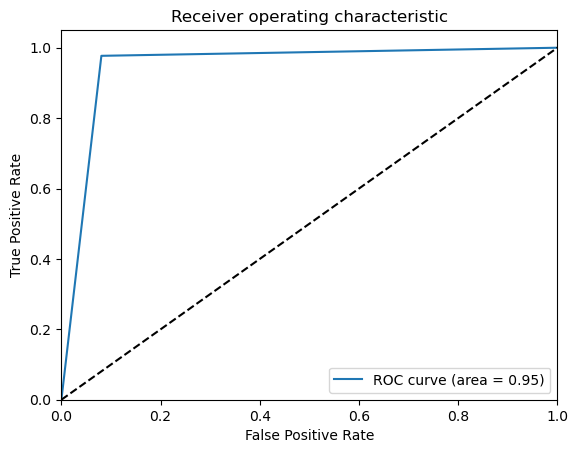

In [211]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
false, true, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# XGB Classifier

In [212]:
from xgboost import XGBClassifier   # xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler3 = StandardScaler()
X1_train_scaled = scaler3.fit_transform(X_train)
X1_test_scaled = scaler3.transform(X_test)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                    n_estimators=750,
                    max_depth=9,
                    learning_rate=0.5,
                    subsample=0.9,
                    colsample_bytree=0.9)

# Fit
xgb.fit(X1_train_scaled, y_train)

# Predict
y_pred_xgb = xgb.predict(X1_test_scaled)

# Evaluate the classifier
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy}")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(f"Confusion Matrix:\n{cm}")

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [11:26:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9319488005914733
Confusion Matrix:
[[150177  23051]
 [   512 172514]]


Confusion Matrix:
[[172918    310]
 [     2 173024]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    173228
           1       1.00      1.00      1.00    173026

    accuracy                           1.00    346254
   macro avg       1.00      1.00      1.00    346254
weighted avg       1.00      1.00      1.00    346254



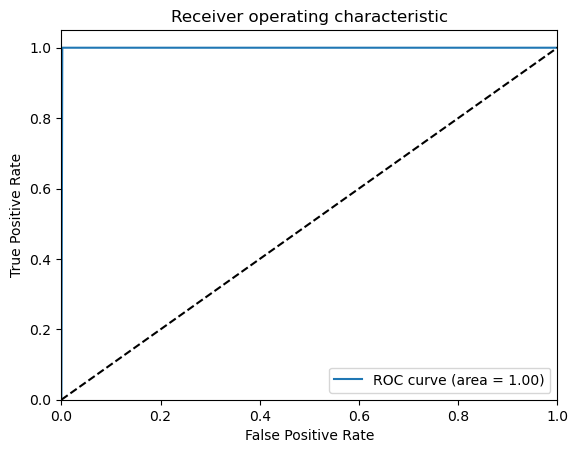

In [248]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

false, true, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(false, true)
plt.plot(false, true, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [217]:
final_data[final_data['TARGET'] == 0].head(1)

,TARGET,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,INCOME_PA,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_YIELD_GROUP,CODE_GENDER,AGE,CLIENT_RATING_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED_log
1,0,3,1,3,3240000.0,7,0.0,3,0,45,1,828.0,291,1186.0,7.080868


In [218]:
final_data[final_data['TARGET'] == 1].head(1)

,TARGET,OCCUPATION_TYPE,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,INCOME_PA,CODE_REJECT_REASON,NAME_CONTRACT_STATUS,NAME_YIELD_GROUP,CODE_GENDER,AGE,CLIENT_RATING_W_CITY,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED_log
0,1,8,4,5,2430000.0,7,0.0,3,1,25,2,1134.0,2120,3648.0,6.458338


In [219]:
#TARGET = 0
sample1 = np.array([[3,1,3,3240000.0,7,0.0,3,0,45,1,828.0,291,1186.0,np.log(7.080868)]])
pred_dt0=Decision_tree.predict(sample1)
if pred_dt0 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Repay


In [ ]:
pred_dt0

In [220]:
#TARGET = 1
sample1 = np.array([[8,4,5,2430000.0,7,0.0,3,1,25,2,1134.0,2120,3648.0,np.log(6.458338)]])
pred_dt1 = Decision_tree.predict(sample1)
if pred_dt1 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Wont Repay


In [ ]:
pred_dt1

In [221]:
#TARGET = 0
sample_r = np.array([[3,1,3,3240000.0,7,0.0,3,0,45,1,828.0,291,1186.0,np.log(7.080868)]])
pred_r0 = random_forest.predict(sample_r)
if pred_r0 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Repay


In [ ]:
pred_r0

In [222]:
#TARGET = 1
sample_r = np.array([[8,4,5,2430000.0,7,0.0,3,1,25,2,1134.0,2120,3648.0,np.log(6.458338)]])
pred_r1 = random_forest.predict(sample_r)
if pred_r1 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Repay


In [ ]:
pred_r1

In [223]:
#TARGET = 0
sample_knn = np.array([[3,1,3,3240000.0,7,0.0,3,0,45,1,828.0,291,1186.0,np.log(7.080868)]])
pred_k0 = knn.predict(sample_knn)
if pred_k0 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Repay


In [ ]:
pred_k0

In [224]:
#TARGET = 1
sample_knn = np.array([[8,4,5,2430000.0,7,0.0,3,1,25,2,1134.0,2120,3648.0,np.log(6.458338)]])
pred_k1 = knn.predict(sample_knn)
if pred_k1 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Repay


In [ ]:
pred_k1

In [225]:
#TARGET = 0
sample_xgb = np.array([[3,1,3,3240000.0,7,0.0,3,0,45,1,828.0,291,1186.0,np.log(7.080868)]])
pred_k0 = xgb.predict(sample_xgb)
if pred_k0 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Repay


In [226]:
#TARGET = 1
sample_xgb = np.array([[8,4,5,2430000.0,7,0.0,3,1,25,2,1134.0,2120,3648.0,np.log(6.458338)]])
pred_x1 = xgb.predict(sample_xgb)
if pred_x1 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Repay


In [227]:
pred_x1

array([0])

In [240]:
import pickle

Dir = 'D:/Guvi_Data_Science/MDT33/Capstone_Project/Final_Project/'

# Saving the KNN model
with open(Dir + 'knnmodel.pkl', 'wb') as file:
    pickle.dump(knn, file)

# Saving the Decision Tree model
with open(Dir + 'dtmodel.pkl', 'wb') as file:
    pickle.dump(Decision_tree, file)

# Saving the Random Forest model
with open(Dir + 'rfmodel.pkl', 'wb') as file:
    pickle.dump(random_forest, file)

# Saving the XGBoost model
with open(Dir + 'xgbmodel.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [242]:
Dir = "D:/Guvi_Data_Science/MDT33/Capstone_Project/Final_Project/"
# Loading the KNN model
with open(Dir + 'dtmodel.pkl', 'rb') as file:
    Decision_tree = pickle.load(file)

In [257]:
#TARGET = 1
sample = np.array([[8,4,5,2430000.0,7,0.0,3,1,25,2,1134.0,2120,3648.0,np.log(6.458338)]])
pred_k1 = Decision_tree.predict(sample)
if pred_k1 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Wont Repay


In [258]:
#TARGET = 0
sample = np.array([[3,1,3,3240000.0,7,0.0,3,0,45,1,828.0,291,1186.0,np.log(7.080868)]])
pred_k0 = Decision_tree.predict(sample)
if pred_k0 == 1:
    print('The status is: Wont Repay')
else:
    print('The status is: Repay')

The status is: Repay


In [259]:
Final_new["NAME_CONTRACT_STATUS"].unique()

array([0. , 1. , 2. , 2.5])